# King County Real Estate - Housing Analysis

## Business Question:

King County Real Estate has hired us to investigate which features of a home have the greatest effect on price.

* They would like us to make a model to predict housing prices.
* From that model, they would like to know which factors have the largest effect on price.

## Data Importing & Cleaning

The dataset "kc_house_data.csv" was obtained from the link below. King County 2014-2015 House Sales dataset

https://osf.io/twq9p/

https://github.com/bigbenx3/housing_analysis_project/blob/main/column_names%20descriptions.md

The descriptions for each feature/column in the dataset

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import scipy.stats as stats


sns.set_style("whitegrid")
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)})

In [2]:
url = "https://raw.githubusercontent.com/learn-co-curriculum/dsc-phase-2-project/main/data/kc_house_data.csv"
df_import = pd.read_csv(url, error_bad_lines=False)

In [3]:
df_import.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


Sneak preview of all the features in dataset.

#### Exploring Datatypes - What are the datatypes present?

Ideally we want to look at what the feature is and make sure certain features that are expected to be numerical, that they are in fact numerical and rectify accordingly.

In [4]:
df_import.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df_import.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

There are three columns/ features that have missing (NaN) or empty values: 

* waterfront
* view
* yr_renovated

<b>Let's see if there are duplicates in the dataset first</b>

In [6]:
df_import.duplicated().sum()

0

No duplicates to remove that may diminish the number of null values we have to contend with.

And for "waterfront" and "year renovated", the null values make up a large portion. Just dropping those values may not be the best idea.

Let's go through all the datatypes and make sure they correctly correspond to each feature. This may help our efforts to rectify the missing values, as well.

The link below gives descriptions for each feature of this dataset.
https://github.com/bigbenx3/housing_analysis_project/blob/main/column_names%20descriptions.md

Looking at the descriptions from the .MD file in the link above and then later closely at values in some of the columns, we can discern whether the feature is categorical or quantitative in nature for this dataset.

We will ignore "id" and "date" features for now.

#### Switch to new dataframe name df1_mod_ed

This new df will be the copy of the original dataframe which we will modify.

In [7]:
df_mod_ed = df_import.copy()
df_mod_ed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


<b>Why are bathrooms and floors floats and not integers?</b>

In [8]:
import pandas as pd
bathrooms_unique_values = df_mod_ed["bathrooms"].unique()
print(sorted(bathrooms_unique_values))

[0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75, 3.0, 3.25, 3.5, 3.75, 4.0, 4.25, 4.5, 4.75, 5.0, 5.25, 5.5, 5.75, 6.0, 6.25, 6.5, 6.75, 7.5, 7.75, 8.0]


According to the links below:
https://www.badeloftusa.com/buying-guides/75-bathroom/

https://www.badeloftusa.com/buying-guides/bathrooms/#:~:text=A%20half%20bathroom%20is%20a,just%20a%20toilet%20and%20sink.

The decimals, (.25, .5, .75), all indicate the type and size of bathrooms within the homes.
So, this isn't incorrect.

In [9]:
import pandas as pd
floors_unique_values = df_mod_ed["floors"].unique()
print(sorted(floors_unique_values))

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


Accordingly, a half a story indicates smaller space on the "half floors" 
See the link below.
https://www.gimme-shelter.com/what-is-a-1-5-storey-house-50104/

Now, waterfront. One of the columns with null values.

<AxesSubplot:xlabel='waterfront', ylabel='Count'>

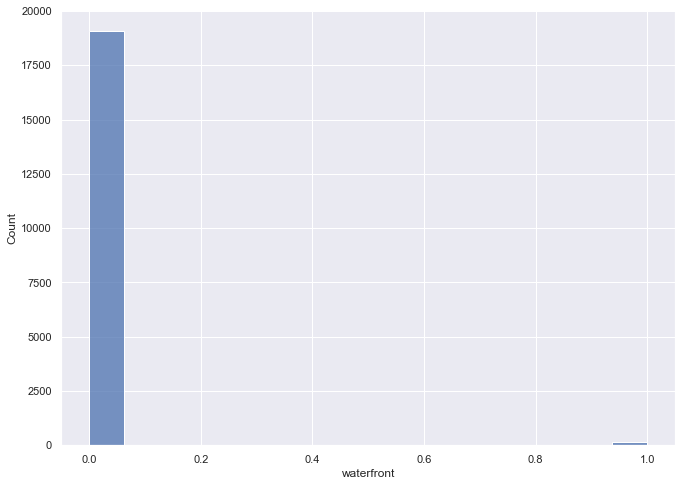

In [10]:
sns.histplot(df_mod_ed["waterfront"])

Overwhelming number of homes with no waterfront view.

In [11]:
df_mod_ed.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [12]:
df_mod_ed["waterfront"] = df_mod_ed["waterfront"].fillna(0)

<AxesSubplot:xlabel='waterfront', ylabel='Count'>

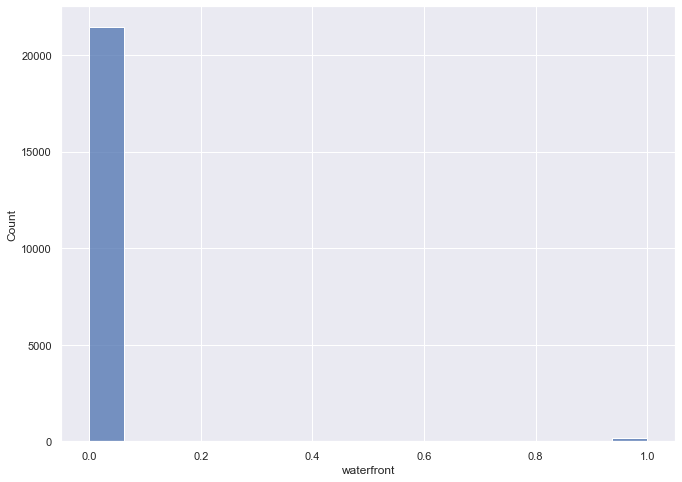

In [13]:
sns.histplot(df_mod_ed["waterfront"])

The new distribution and there no longer any nulls.

In [14]:
import pandas as pd
waterfront_unique_values = df_mod_ed["waterfront"].unique()
print(sorted(waterfront_unique_values))

[0.0, 1.0]


Base on the description, waterfront measures whether a house has a view to a waterfront. This list of unique values suggest that the "0" and "1" responds to "absence" and "presence" of a waterfront view, respectively. And that there are missing values. 

This would conclude waterfront to be a categorical feature. And right now, it is a numerical value as a float.

In [15]:
df_mod_ed["waterfront"] = df_mod_ed["waterfront"].astype(str)

In [16]:
type(df_mod_ed["waterfront"][0])

str

Now it is a categorical feature.

Double check with .info()

Again, "waterfront" no longer has missing values. The features "view" and "yr_renovated" still have missing values.

In [17]:
import pandas as pd
view_unique_values = df_mod_ed["view"].unique()
sorted(view_unique_values)

[0.0, nan, 1.0, 2.0, 3.0, 4.0]

view - is a record for how many times the house has been viewed. And there are missing values.

<AxesSubplot:xlabel='view', ylabel='Count'>

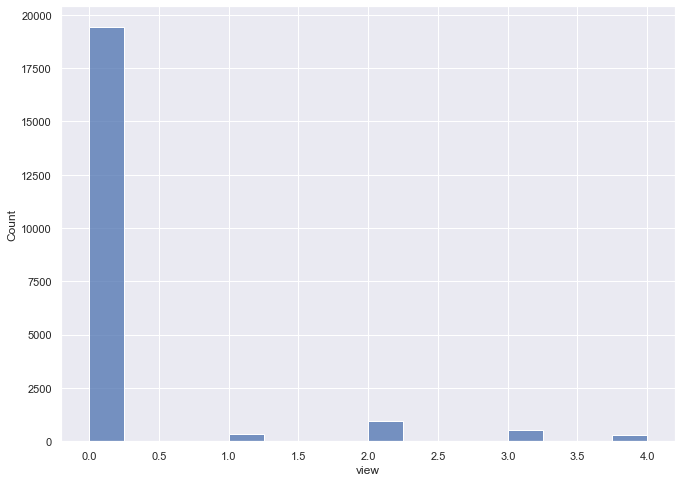

In [18]:
sns.histplot(df_mod_ed["view"])

In [19]:
df_mod_ed.view.describe()

count    21534.000000
mean         0.233863
std          0.765686
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: view, dtype: float64

It's a bit odd to find that a majority of the homes have not been viewed at any one time, before presumably being sold. 
I wonder why that is...

Let's try to fill both missing values for "yr_renovated" and "view" with the median

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

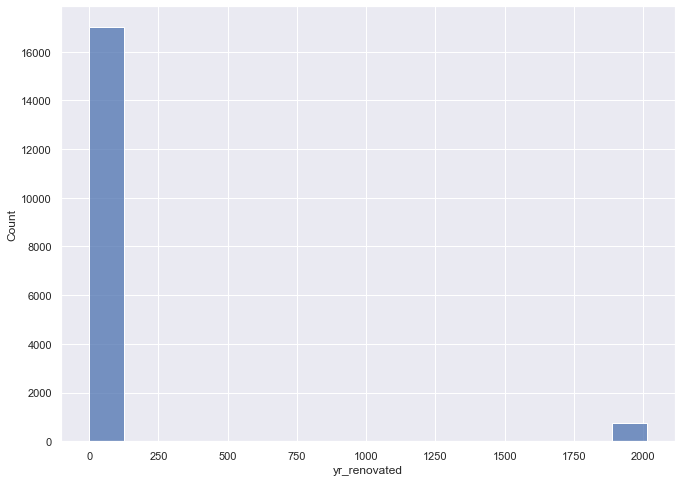

In [20]:
sns.histplot(df_mod_ed["yr_renovated"])

In [21]:
view_median = df_mod_ed.view.median()
view_median

0.0

In [22]:
yr_renovated_median = df_mod_ed.yr_renovated.median()
yr_renovated_median

0.0

In [23]:
df_mod_ed.fillna(value = {"view":view_median,"yr_renovated":yr_renovated_median}
                                ,inplace = True)

<AxesSubplot:xlabel='view', ylabel='Count'>

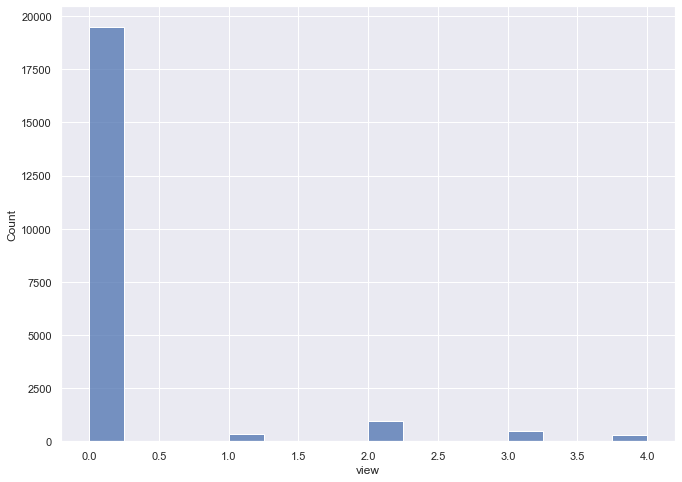

In [24]:
sns.histplot(df_mod_ed["view"])

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

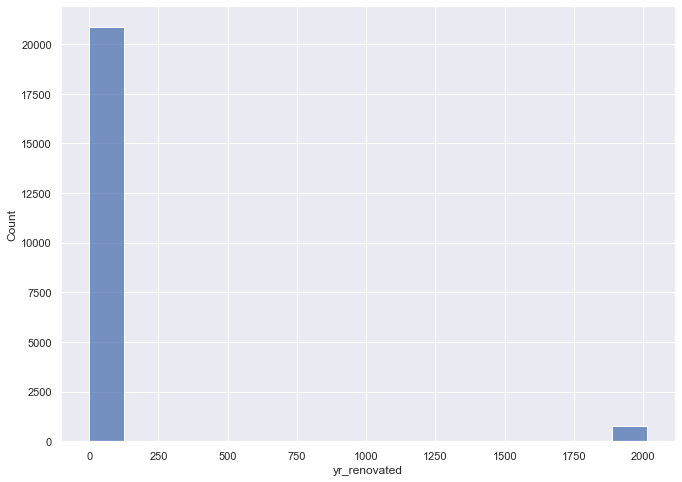

In [25]:
sns.histplot(df_mod_ed["yr_renovated"])

#### IMPROVE?

Turns out that for both columns, the median was 0. For now, that will have to do to fill in the missing values for "yr_renovated" and "view"

In [26]:
df_mod_ed.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

#### No nulls for Now...

Continuing to check thru the features and whether they have appropriate corresponding datatypes.

In [27]:
import pandas as pd
condition_unique_values = df_mod_ed["condition"].unique()
print(sorted(condition_unique_values))

[1, 2, 3, 4, 5]


Condition may be presumed to contain qualitative data. However, the numerical scale for condition, so quantitative feature.

In [28]:
import pandas as pd
grade_unique_values = df_mod_ed["grade"].unique()
print(sorted(grade_unique_values))

[3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


Grading scales may be either categorical or quantitative. Grading scale from 3 to 13, quantitative feature.

In [29]:
import pandas as pd
sqft_basement_unique_values = df_mod_ed["sqft_basement"].unique()
sorted(sqft_basement_unique_values)

['0.0',
 '10.0',
 '100.0',
 '1000.0',
 '1008.0',
 '1010.0',
 '1020.0',
 '1024.0',
 '1030.0',
 '1040.0',
 '1050.0',
 '1060.0',
 '1070.0',
 '1080.0',
 '1090.0',
 '110.0',
 '1100.0',
 '1110.0',
 '1120.0',
 '1130.0',
 '1135.0',
 '1140.0',
 '1150.0',
 '1160.0',
 '1170.0',
 '1180.0',
 '1190.0',
 '120.0',
 '1200.0',
 '1210.0',
 '1220.0',
 '1230.0',
 '1240.0',
 '1245.0',
 '1248.0',
 '1250.0',
 '1260.0',
 '1270.0',
 '1275.0',
 '1280.0',
 '1281.0',
 '1284.0',
 '1290.0',
 '130.0',
 '1300.0',
 '1310.0',
 '1320.0',
 '1330.0',
 '1340.0',
 '1350.0',
 '1360.0',
 '1370.0',
 '1380.0',
 '1390.0',
 '140.0',
 '1400.0',
 '1410.0',
 '1420.0',
 '143.0',
 '1430.0',
 '1440.0',
 '145.0',
 '1450.0',
 '1460.0',
 '1470.0',
 '1480.0',
 '1481.0',
 '1490.0',
 '150.0',
 '1500.0',
 '1510.0',
 '1520.0',
 '1525.0',
 '1530.0',
 '1540.0',
 '1548.0',
 '1550.0',
 '1560.0',
 '1570.0',
 '1580.0',
 '1590.0',
 '160.0',
 '1600.0',
 '1610.0',
 '1620.0',
 '1630.0',
 '1640.0',
 '1650.0',
 '1660.0',
 '1670.0',
 '1680.0',
 '1690.0',
 '

So there is a "?" as the last unique value for this column.

In [30]:
type(df_mod_ed["sqft_basement"][0])

str

And sqft_basement column should hold numerical values corresponding to square footage of the basement. 
Right now, they're all string values.

We need to replace the "?" first before converting the "sqft_basement" values to an integer type.

In [31]:
df_mod_ed.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1930.0        1
2720.0        1
4820.0        1
1525.0        1
3480.0        1
Name: sqft_basement, Length: 304, dtype: int64

There are 454 entries corresponding to the "?". And yet here the data type states integer...

<AxesSubplot:xlabel='sqft_basement', ylabel='Count'>

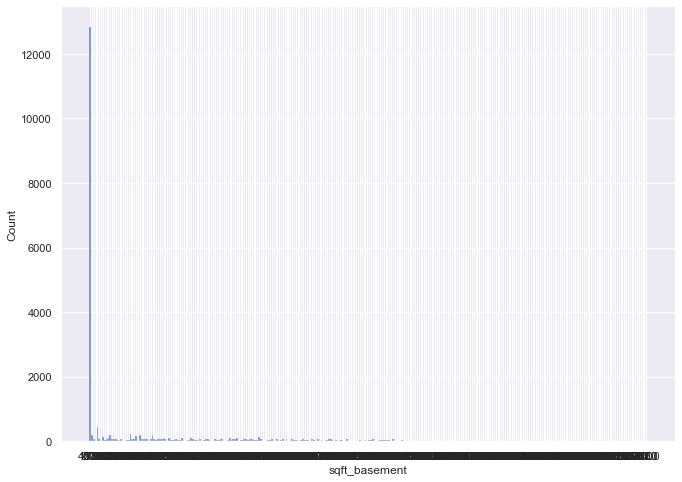

In [32]:
sns.histplot(df_mod_ed["sqft_basement"])

So with this sort of huge disparity in the distribution of values for sqft_basement (square footage of the basement) and inputting any value might introduce bias...

In [33]:
df_mod_ed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


It would seem that... 
sqft_living, sqft_livingsquare (footage of the home), minus the sqft_above (square footage of house apart from basement) equals sqft_basement (square footage of the basement).

sqft_living  -  sqft_above = sqft_basement

Therefore, sqft_above and sqft_basement is a bit redundant info regarding square footage of the home.
It seems the most appropriate action seeing the huge disparity again in sqft_basement.


<b>We will decide to drop "sqft_above" and "sqft_basement"

In [34]:
df_mod_ed = df_mod_ed.drop(columns=["sqft_above", "sqft_basement"])
df_mod_ed.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503


The columns "sqft_above", "sqft_basement" have been dropped.

Now, to look at "zipcode"

Zipcode should be categorical variable and not an "int64" integer. So we have to change the values to string.

In [35]:
df_mod_ed["zipcode"] = df_mod_ed["zipcode"].astype(str)

In [36]:
type(df_mod_ed["zipcode"][0])

str

Note: categorical data need to be encoded to be used in a model that accepts only numerical values.

#### NEW DF - df1

Before we start removing outliers, we'll use a copy of df_mod_ed to continue cleaning. 

In [37]:
df1 = df_mod_ed.copy()
df1.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data - Cleaning & Manipulation

#### Outlier Detection

Let's again look back at the sort of data that we have, using the .describe() function.
Are there outliers we should remove first?

In [38]:
df1.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.233181,3.409825,7.657915,1970.999676,68.758207,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.764673,0.650546,1.173200,29.375234,364.037499,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,0.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,0.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,4.000000,5.000000,13.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000



* "id" but we will ignore this feature because the id is unique identifier for each house


* "date" when house was sold, sort of irrelevant at face value to house price


* "view" is how many times the house was viewed. This isn't really relevant but will be confirmed with the .corr(). And they 
  are just counts of the times viewed, not really applicable to eliminate outliers for.


* "waterfront" is based on presence or absence of a waterfront. The "1" and "0" are indicative of presence of waterfront. No 
  outliers there.


So we see a couple of max values that are way outside of the 75 percentile: 

* "bedrooms" :      33 bedrooms max when the 75% is 4 bedrooms


* "bathrooms":       8 bathrooms max when 75% is 2.5 bathrooms


* "sqft_living":    13540 sqft max when 75% is 2550 sqft


* "sqft_lot":       1.65 million sqft when 75% is 10688 sqft


* "sqft_above":     9410 sqft max when 75% is 2210 sqft


* "sqft_basement":  4820 sqft max when 75% is 560 sqft 


* "sqft_living15":  6210 sqft max when 75% is 2360 sqft


* "sqft_lot15":     871200 sqft max, 75% is 10083 sqft


You may have noticed that such features as "price", "grade", "condition", "yr_built", "yr_renovated", "zipcode", "lat", "long" 
were not included as features needing to remove outliers. 
These will be reviewed later down the line.

So to prevent skewing of our model, let's try and remove the outliers from all the columns.

#### Bedrooms

First, let's set up an initial test run that will iterate through all the columns in our data frame.
We'll use "bedrooms" to test.

In [39]:
df1.bedrooms.describe()

count    21597.000000
mean         3.373200
std          0.926299
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

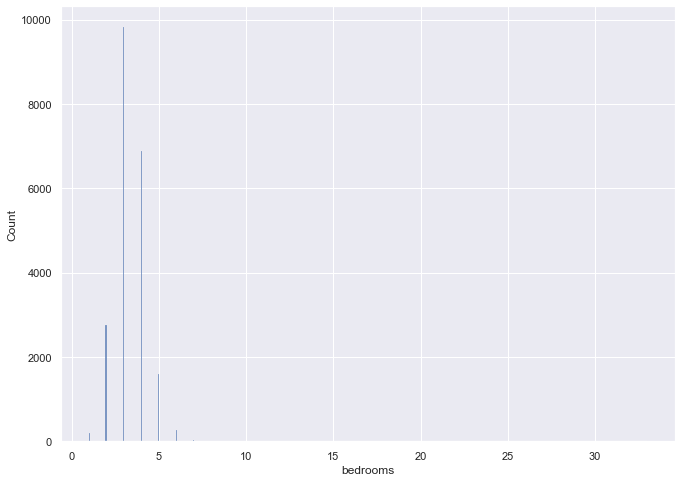

In [40]:
sns.histplot(df1["bedrooms"])

We see the histogram display extend to include the 33 bedrooms, however, most of the data is within 7 bedrooms.

Let's set up the upper and lower limits.

In [41]:
upper_limit = df1.bedrooms.mean() + 3*df1.bedrooms.std()
upper_limit

6.152096665105352

In [42]:
lower_limit = df1.bedrooms.mean() - 3*df1.bedrooms.std()
lower_limit

0.5943032978524658

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [43]:
df1[(df1.bedrooms>upper_limit)|(df1.bedrooms<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
556,5486800070,6/20/2014,1950000.0,7,3.50,4640,15235,2.0,0.0,1.0,3,11,1965,2003.0,98040,47.5666,-122.231,3230,20697
1134,4024100951,1/5/2015,420000.0,7,3.00,2940,8624,1.0,0.0,0.0,3,8,1977,0.0,98155,47.7555,-122.307,1850,8031
1239,7227802030,6/23/2014,350000.0,7,3.00,2800,9569,1.0,0.0,2.0,3,7,1963,0.0,98056,47.5102,-122.183,2150,7333
1658,9126101740,12/4/2014,490000.0,8,5.00,2800,2580,2.0,0.0,0.0,3,8,1997,0.0,98122,47.6086,-122.303,1800,2580
3717,5451100490,1/15/2015,884900.0,7,4.75,5370,10800,1.5,0.0,0.0,3,8,1967,0.0,98040,47.5380,-122.223,2310,10910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18808,4040500100,10/20/2014,539000.0,7,2.25,2620,6890,2.0,0.0,0.0,4,7,1961,0.0,98007,47.6123,-122.134,2070,7910
18960,1778360150,6/20/2014,1240000.0,7,5.50,6630,13782,2.0,0.0,0.0,3,10,2004,0.0,98006,47.5399,-122.118,4470,8639
19239,8812401450,12/29/2014,660000.0,10,3.00,2920,3745,2.0,0.0,0.0,4,7,1913,0.0,98105,47.6635,-122.320,1810,3745
19287,3756900027,11/25/2014,575000.0,8,3.00,3840,15990,1.0,0.0,0.0,3,7,1961,0.0,98034,47.7111,-122.211,1380,8172


So, these would be our outliers, 75 of them for the "bedrooms" column. Those entries below the "lower_limit" and above the "upper_limit".

In [44]:
df_out_rmv1 = df1[(df1.bedrooms<upper_limit) & (df1.bedrooms>lower_limit)]
df_out_rmv1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


In [45]:
df_out_rmv1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21535 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21535 non-null  int64  
 1   date           21535 non-null  object 
 2   price          21535 non-null  float64
 3   bedrooms       21535 non-null  int64  
 4   bathrooms      21535 non-null  float64
 5   sqft_living    21535 non-null  int64  
 6   sqft_lot       21535 non-null  int64  
 7   floors         21535 non-null  float64
 8   waterfront     21535 non-null  object 
 9   view           21535 non-null  float64
 10  condition      21535 non-null  int64  
 11  grade          21535 non-null  int64  
 12  yr_built       21535 non-null  int64  
 13  yr_renovated   21535 non-null  float64
 14  zipcode        21535 non-null  object 
 15  lat            21535 non-null  float64
 16  long           21535 non-null  float64
 17  sqft_living15  21535 non-null  int64  
 18  sqft_l

<AxesSubplot:xlabel='bedrooms', ylabel='Count'>

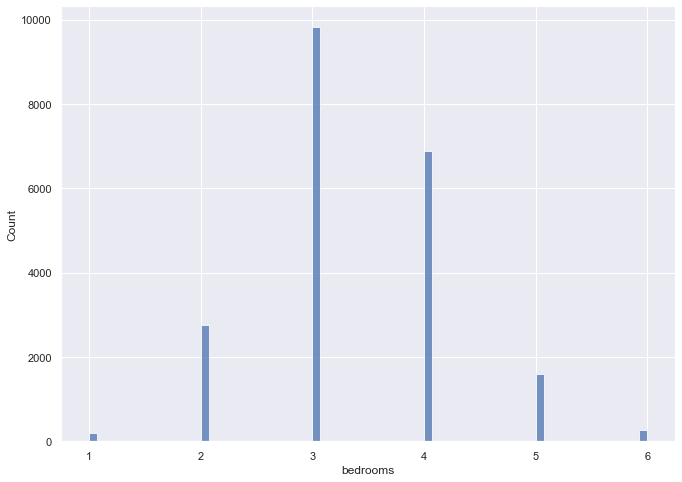

In [46]:
sns.histplot(df_out_rmv1["bedrooms"])

So we started out with 21,613 non-null entries and now end up with 21538 remaining entries (still non-null entries) as displayed by .info(). That is congruent to 75 outliers we saw before removed from the original dataframe.

#### Bathrooms

In [47]:
df_out_rmv1.bathrooms.describe()

count    21535.000000
mean         2.111400
std          0.762291
min          0.500000
25%          1.750000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

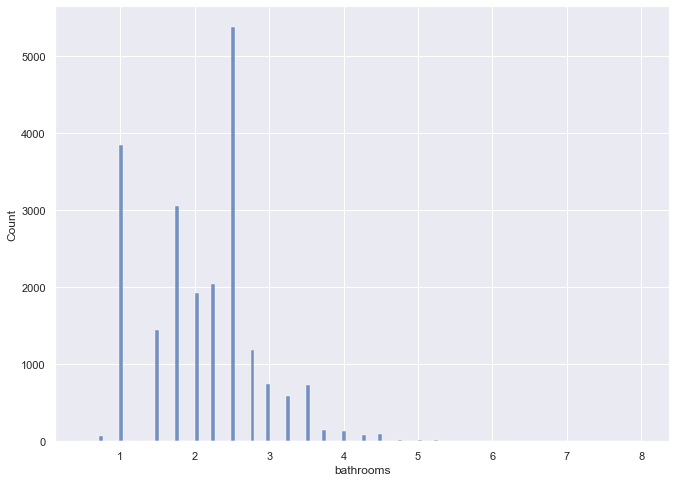

In [48]:
sns.histplot(df_out_rmv1["bathrooms"])

Let's set up the upper and lower limits.

In [49]:
upper_limit = df_out_rmv1.bathrooms.mean() + 3*df_out_rmv1.bathrooms.std()
upper_limit

4.398271820553814

In [50]:
lower_limit = df_out_rmv1.bathrooms.mean() - 3*df_out_rmv1.bathrooms.std()
lower_limit

-0.17547172768174502

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [51]:
df_out_rmv1[(df_out_rmv1.bathrooms>upper_limit)|(df_out_rmv1.bathrooms<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
5,7237550310,5/12/2014,1230000.0,4,4.50,5420,101930,1.0,0.0,0.0,3,11,2001,0.0,98053,47.6561,-122.005,4760,101930
270,4054500390,10/7/2014,1370000.0,4,4.75,5310,57346,2.0,0.0,0.0,4,11,1989,0.0,98077,47.7285,-122.042,4180,47443
300,3225069065,6/24/2014,3080000.0,4,5.00,4550,18641,1.0,1.0,4.0,3,10,2002,0.0,98074,47.6053,-122.077,4550,19508
450,4055700030,5/2/2015,1450000.0,3,4.50,3970,24920,2.0,0.0,2.0,3,10,1977,0.0,98034,47.7183,-122.258,2610,13838
527,3225079035,6/18/2014,1600000.0,6,5.00,6050,230652,2.0,0.0,3.0,3,11,2001,0.0,98024,47.6033,-121.943,4210,233971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21328,8835770170,8/22/2014,1490000.0,5,6.00,6880,279968,2.0,0.0,3.0,3,12,2007,0.0,98045,47.4624,-121.779,4690,256803
21478,2413910120,7/2/2014,915000.0,3,4.50,3850,62726,2.0,0.0,0.0,3,10,2013,0.0,98053,47.6735,-122.058,2630,46609
21490,2524069097,5/9/2014,2240000.0,5,6.50,7270,130017,2.0,0.0,0.0,3,12,2010,0.0,98027,47.5371,-121.982,1800,44890
21535,1561750040,12/24/2014,1380000.0,5,4.50,4350,13405,2.0,0.0,0.0,3,11,2014,0.0,98074,47.6018,-122.060,3990,7208


Those entries below the "lower_limit" and above the "upper_limit".

In [52]:
df_out_rmv2 = df_out_rmv1[(df_out_rmv1.bathrooms<upper_limit) & (df_out_rmv1.bathrooms>lower_limit)]
df_out_rmv2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='bathrooms', ylabel='Count'>

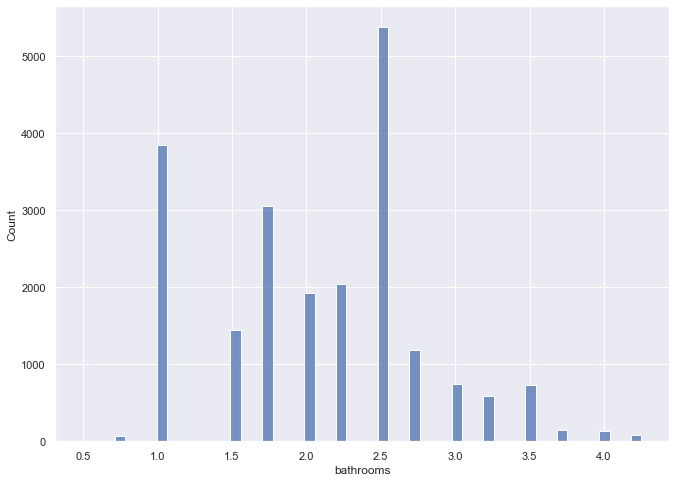

In [53]:
sns.histplot(df_out_rmv2["bathrooms"])

We see the new histogram display after removal of outliers.

#### Sqft_living

In [54]:
df_out_rmv2.sqft_living.describe()

count    21363.000000
mean      2051.320414
std        861.820882
min        370.000000
25%       1420.000000
50%       1900.000000
75%       2520.000000
max       7850.000000
Name: sqft_living, dtype: float64

<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

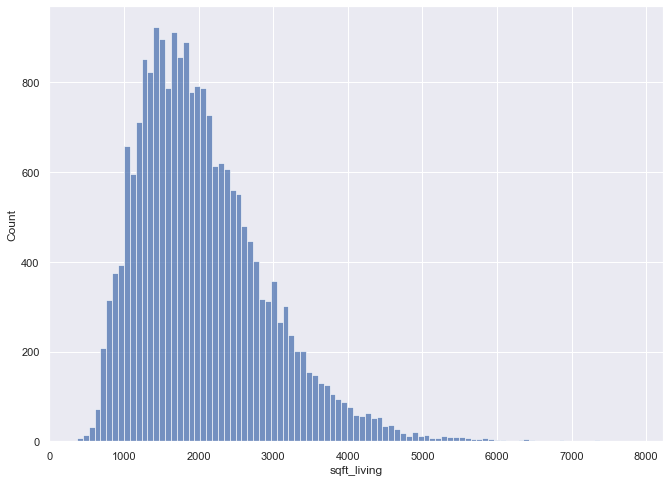

In [55]:
sns.histplot(df_out_rmv2["sqft_living"])

Let's set up the upper and lower limits.

In [56]:
upper_limit = df_out_rmv2.sqft_living.mean() + 3*df_out_rmv2.sqft_living.std()
upper_limit

4636.783060440892

In [57]:
lower_limit = df_out_rmv2.sqft_living.mean() - 3*df_out_rmv2.sqft_living.std()
lower_limit

-534.142232841772

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [58]:
df_out_rmv2[(df_out_rmv2.sqft_living>upper_limit)|(df_out_rmv2.sqft_living<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
70,1525059190,9/12/2014,1040000.0,5,3.25,4770,50094,1.0,0.0,0.0,4,11,1973,0.0,98005,47.6525,-122.160,3530,38917
153,7855801670,4/1/2015,2250000.0,4,3.25,5180,19850,2.0,0.0,3.0,3,12,2006,0.0,98006,47.5620,-122.162,3160,9750
269,7960900060,5/4/2015,2900000.0,4,3.25,5050,20100,1.5,0.0,2.0,3,11,1982,0.0,98004,47.6312,-122.223,3890,20060
384,713500030,7/28/2014,1350000.0,5,3.50,4800,14984,2.0,0.0,2.0,3,11,1998,0.0,98006,47.5543,-122.148,4050,19009
419,8678500060,7/10/2014,1550000.0,5,4.25,6070,171626,2.0,0.0,0.0,3,12,1999,0.0,98024,47.5954,-121.950,4680,211267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21451,2311400056,12/1/2014,1990000.0,5,3.50,5230,8960,2.0,0.0,0.0,3,11,2014,0.0,98004,47.5964,-122.201,2310,9603
21504,7237550100,8/25/2014,1410000.0,4,4.00,4920,50621,2.0,0.0,0.0,3,10,2012,0.0,98053,47.6575,-122.006,4920,74052
21505,7430500110,12/9/2014,1380000.0,5,3.50,5150,12230,2.0,0.0,2.0,3,10,2007,0.0,98008,47.6249,-122.090,2940,13462
21514,8964800330,4/7/2015,3000000.0,4,3.75,5090,14823,1.0,0.0,0.0,3,11,2013,0.0,98004,47.6200,-122.207,3030,12752


Those entries below the "lower_limit" and above the "upper_limit".

In [59]:
df_out_rmv3 = df_out_rmv2[(df_out_rmv2.sqft_living<upper_limit) & (df_out_rmv2.sqft_living>lower_limit)]
df_out_rmv3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_living', ylabel='Count'>

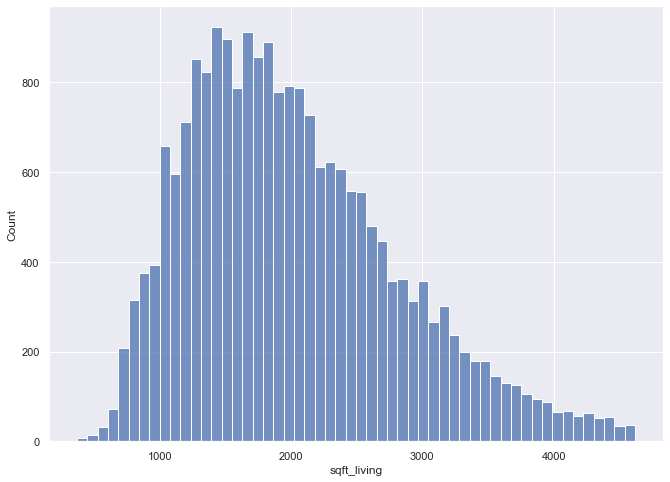

In [60]:
sns.histplot(df_out_rmv3["sqft_living"])

We see the new histogram display after removal of outliers.

#### Sqft_lot

In [61]:
df_out_rmv3.sqft_lot.describe()

count    2.115000e+04
mean     1.457195e+04
std      3.989216e+04
min      5.200000e+02
25%      5.005000e+03
50%      7.560000e+03
75%      1.046400e+04
max      1.651359e+06
Name: sqft_lot, dtype: float64

<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

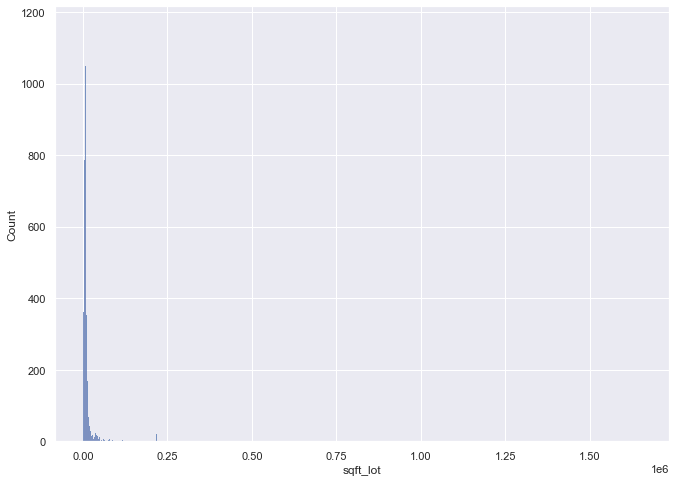

In [62]:
sns.histplot(df_out_rmv3["sqft_lot"])

Let's set up the upper and lower limits.

In [63]:
upper_limit = df_out_rmv3.sqft_lot.mean() + 3*df_out_rmv3.sqft_lot.std()
upper_limit

134248.41899222514

In [64]:
lower_limit = df_out_rmv3.sqft_lot.mean() - 3*df_out_rmv3.sqft_lot.std()
lower_limit

-105104.51695912822

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [65]:
df_out_rmv3[(df_out_rmv3.sqft_lot>upper_limit)|(df_out_rmv3.sqft_lot<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
145,1526069017,12/3/2014,921500.0,4,2.50,3670,315374,2.0,0.0,0.0,4,9,1994,0.0,98077,47.7421,-122.026,2840,87991
199,1222069094,10/14/2014,385000.0,3,1.75,1350,155073,1.0,0.0,0.0,4,7,1969,0.0,98038,47.4058,-121.994,1560,50965
238,326069104,7/1/2014,800000.0,3,3.50,3830,221284,2.0,0.0,0.0,3,10,1993,0.0,98077,47.7641,-122.023,2920,148539
380,1726059053,9/16/2014,270000.0,2,1.50,1380,209959,1.0,0.0,0.0,1,6,1954,0.0,98011,47.7461,-122.195,3130,19868
411,2422029094,7/16/2014,517534.0,2,1.00,833,143947,1.0,0.0,0.0,3,5,2006,0.0,98070,47.3889,-122.482,1380,143947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21074,1624079024,5/15/2014,720000.0,3,2.50,3150,151588,2.0,0.0,0.0,3,9,2007,0.0,98024,47.5720,-121.926,2410,208652
21309,2826079027,11/12/2014,659000.0,3,2.50,3090,384634,2.0,0.0,0.0,3,8,2007,0.0,98019,47.7072,-121.927,2200,292645
21335,3421069049,10/21/2014,565000.0,2,1.75,1130,276170,1.0,0.0,0.0,3,8,2006,0.0,98022,47.2673,-122.027,2092,217800
21415,2725079018,5/9/2014,800000.0,4,3.25,3540,159430,2.0,0.0,0.0,3,9,2007,0.0,98014,47.6285,-121.899,1940,392040


Those entries below the "lower_limit" and above the "upper_limit".

In [66]:
df_out_rmv4 = df_out_rmv3[(df_out_rmv3.sqft_lot<upper_limit) & (df_out_rmv3.sqft_lot>lower_limit)]
df_out_rmv4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_lot', ylabel='Count'>

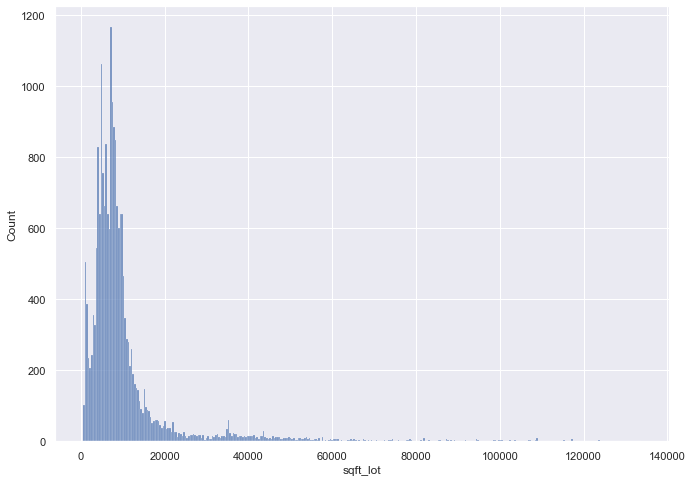

In [67]:
sns.histplot(df_out_rmv4["sqft_lot"])

We see the new histogram display after removal of outliers.

#### Sqft_living15

In [68]:
df_out_rmv4.sqft_living15.describe()

count    20827.000000
mean      1953.841120
std        647.662431
min        399.000000
25%       1480.000000
50%       1820.000000
75%       2320.000000
max       5790.000000
Name: sqft_living15, dtype: float64

<AxesSubplot:xlabel='sqft_living15', ylabel='Count'>

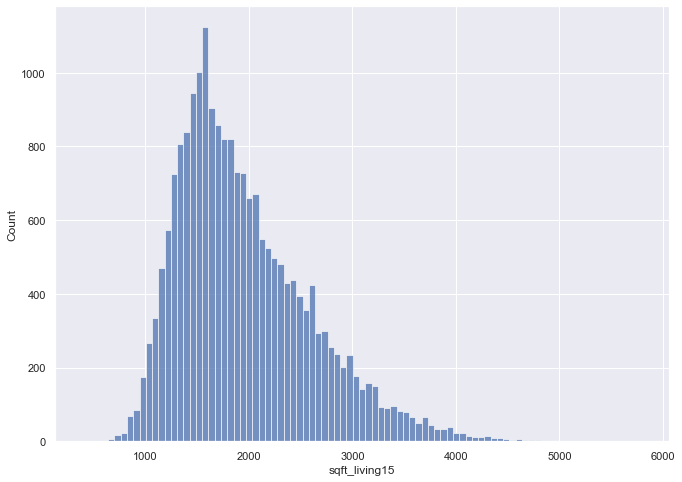

In [69]:
sns.histplot(df_out_rmv4["sqft_living15"])

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [70]:
df_out_rmv4[(df_out_rmv4.sqft_living15>upper_limit)|(df_out_rmv4.sqft_living15<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No outliers displayed.

#### Sqft_lot15

In [71]:
df_out_rmv4.sqft_lot15.describe()

count     20827.000000
mean      10299.062563
std       15587.828662
min         651.000000
25%        5040.000000
50%        7522.000000
75%        9828.000000
max      434728.000000
Name: sqft_lot15, dtype: float64

<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

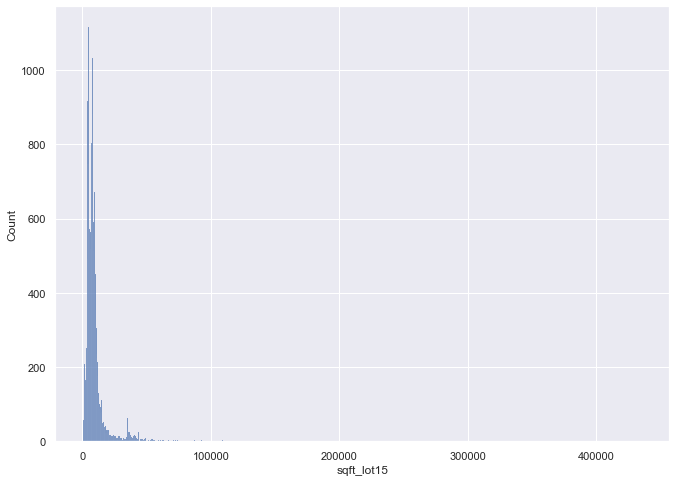

In [72]:
sns.histplot(df_out_rmv4["sqft_lot15"])

Let's set up the upper and lower limits.

In [73]:
upper_limit = df_out_rmv4.sqft_lot15.mean() + 3*df_out_rmv4.sqft_lot15.std()
upper_limit

57062.54854896887

In [74]:
lower_limit = df_out_rmv4.sqft_lot15.mean() - 3*df_out_rmv4.sqft_lot15.std()
lower_limit

-36464.42342293056

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [75]:
df_out_rmv4[(df_out_rmv4.sqft_lot15>upper_limit)|(df_out_rmv4.sqft_lot15<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
49,822039084,3/11/2015,1350000.0,3,2.50,2753,65005,1.0,1.0,2.0,5,9,1953,0.0,98070,47.4041,-122.451,2680,72513
98,722079104,7/11/2014,314000.0,3,1.75,1810,41800,1.0,0.0,0.0,5,7,1980,0.0,98038,47.4109,-121.958,1650,135036
132,1243100136,6/12/2014,784000.0,3,3.50,3950,111078,1.5,0.0,0.0,3,9,1989,0.0,98052,47.6970,-122.072,2480,88500
147,3224079105,8/6/2014,430000.0,2,2.50,2420,60984,2.0,0.0,0.0,3,7,2007,0.0,98027,47.5262,-121.943,1940,193842
198,2824079053,1/13/2015,440000.0,3,2.50,1910,66211,2.0,0.0,0.0,3,7,1997,0.0,98024,47.5385,-121.911,2330,67268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21271,123059127,5/2/2014,625000.0,4,3.25,2730,54014,1.0,0.0,0.0,3,9,2007,0.0,98059,47.5133,-122.110,2730,111274
21345,3123089027,7/21/2014,472000.0,3,2.50,3800,104979,2.0,0.0,0.0,3,8,2005,0.0,98045,47.4304,-121.841,2040,109771
21370,774101755,4/17/2015,320000.0,3,1.75,1790,66250,1.5,0.0,0.0,3,7,2003,0.0,98014,47.7179,-121.403,1440,59346
21470,98300230,4/28/2015,1460000.0,4,4.00,4620,130208,2.0,0.0,0.0,3,10,2014,0.0,98024,47.5885,-121.939,4620,131007


Those entries below the "lower_limit" and above the "upper_limit".

In [76]:
df_out_rmv_all = df_out_rmv4[(df_out_rmv4.sqft_lot15<upper_limit) & (df_out_rmv4.sqft_lot15>lower_limit)]
df_out_rmv_all

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='sqft_lot15', ylabel='Count'>

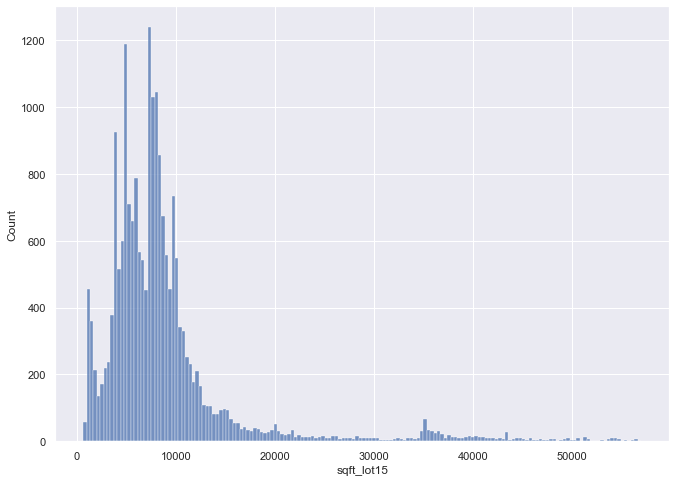

In [77]:
sns.histplot(df_out_rmv_all["sqft_lot15"])

We see the new histogram display after removal of outliers.

In [78]:
df_out_rmv_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20552 entries, 0 to 21596
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20552 non-null  int64  
 1   date           20552 non-null  object 
 2   price          20552 non-null  float64
 3   bedrooms       20552 non-null  int64  
 4   bathrooms      20552 non-null  float64
 5   sqft_living    20552 non-null  int64  
 6   sqft_lot       20552 non-null  int64  
 7   floors         20552 non-null  float64
 8   waterfront     20552 non-null  object 
 9   view           20552 non-null  float64
 10  condition      20552 non-null  int64  
 11  grade          20552 non-null  int64  
 12  yr_built       20552 non-null  int64  
 13  yr_renovated   20552 non-null  float64
 14  zipcode        20552 non-null  object 
 15  lat            20552 non-null  float64
 16  long           20552 non-null  float64
 17  sqft_living15  20552 non-null  int64  
 18  sqft_l

###### So after all the outliers are removed, we are left with 20012 non-null entries in our dataframe, now renamed as "df_out_rmv_all", indicated by our .info().

#### Location

We can plot the data from "df_out_rmv_all" to see the location of each house in respective of its "price"

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

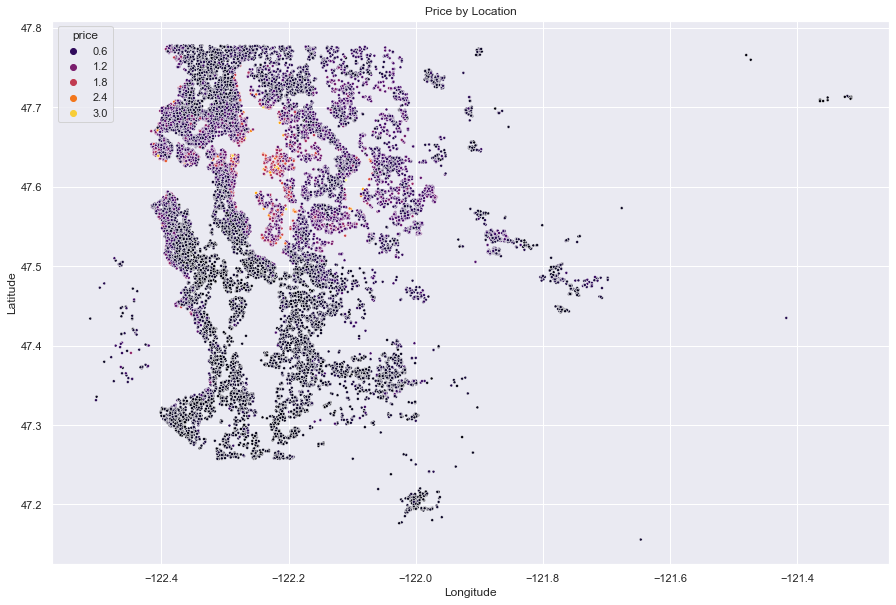

In [79]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_out_rmv_all["long"], y=df_out_rmv_all["lat"], hue=df_out_rmv_all["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

To be honest, the graphical plot isn't that indicative of location being a huge contributor to price. There seems to be just pockets of above 1.2 million USD homes and the majority of homes priced at, less than or equal to 1.2 million USD.

In [80]:
df_out_rmv_all["price"].describe()

count    2.055200e+04
mean     5.158910e+05
std      3.014929e+05
min      7.800000e+04
25%      3.180000e+05
50%      4.450000e+05
75%      6.253125e+05
max      3.400000e+06
Name: price, dtype: float64

And all these prices shown on the scatter plot are in millions of $ (2014 - 2015 USD). Our max is at 3.1 million dollars here displayed by our .describe() function.

From our scatter plot of location and the .describe() function, it would appear that we may have skewed distribution of prices. Let's see a histogram plot of price.

<AxesSubplot:xlabel='price', ylabel='Count'>

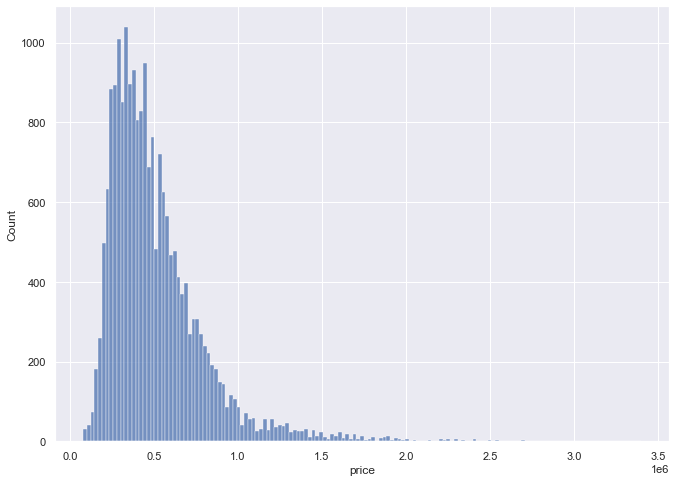

In [81]:
sns.histplot(df_out_rmv_all["price"])

After the other features with max well over the 75 percentile removed of their outliers. We will revisit the features we had put aside before.

These features include "price", "grade", "condition", "yr_built", "yr_renovated", "zipcode", "lat", "long" 
that were not included as features needing to remove outliers, before. 
Let's see their distributions now.

#### Price

Let's set up the upper and lower limits.

In [82]:
upper_limit = df_out_rmv_all.price.mean() + 3*df_out_rmv_all.price.std()
upper_limit

1420369.5904382865

In [83]:
lower_limit = df_out_rmv_all.price.mean() - 3*df_out_rmv_all.price.std()
lower_limit

-388587.6642997113

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [84]:
df_out_rmv_all[(df_out_rmv_all.price>upper_limit)|(df_out_rmv_all.price<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21,2524049179,8/26/2014,2000000.0,3,2.75,3050,44867,1.0,0.0,4.0,3,9,1968,0.0,98040,47.5316,-122.233,4110,20336
125,4389200955,3/2/2015,1450000.0,4,2.75,2750,17789,1.5,0.0,0.0,3,8,1914,1992.0,98004,47.6141,-122.212,3060,11275
216,46100204,2/21/2015,1510000.0,5,3.00,3300,33474,1.0,0.0,3.0,3,9,1957,1991.0,98040,47.5673,-122.210,3836,20953
246,2025069065,9/29/2014,2400000.0,4,2.50,3650,8354,1.0,1.0,4.0,3,9,2000,0.0,98074,47.6338,-122.072,3120,18841
282,7424700045,5/13/2015,2050000.0,5,3.00,3830,8480,2.0,0.0,1.0,5,9,1905,1994.0,98122,47.6166,-122.287,3050,7556
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21498,3262300818,2/27/2015,1870000.0,4,3.75,3790,8797,2.0,0.0,0.0,3,11,2006,0.0,98039,47.6351,-122.236,2660,12150
21524,715010530,1/13/2015,1880000.0,5,3.50,4410,13000,2.0,0.0,3.0,3,10,2014,0.0,98006,47.5382,-122.111,5790,12969
21552,524059330,1/30/2015,1700000.0,4,3.50,3830,8963,2.0,0.0,0.0,3,10,2014,0.0,98004,47.5990,-122.197,2190,10777
21581,191100405,4/21/2015,1580000.0,4,3.25,3410,10125,2.0,0.0,0.0,3,10,2007,0.0,98040,47.5653,-122.223,2290,10125


Those entries below the "lower_limit" and above the "upper_limit".

In [85]:
df_new_1 = df_out_rmv_all[(df_out_rmv_all.price<upper_limit) & (df_out_rmv_all.price>lower_limit)]
df_new_1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='price', ylabel='Count'>

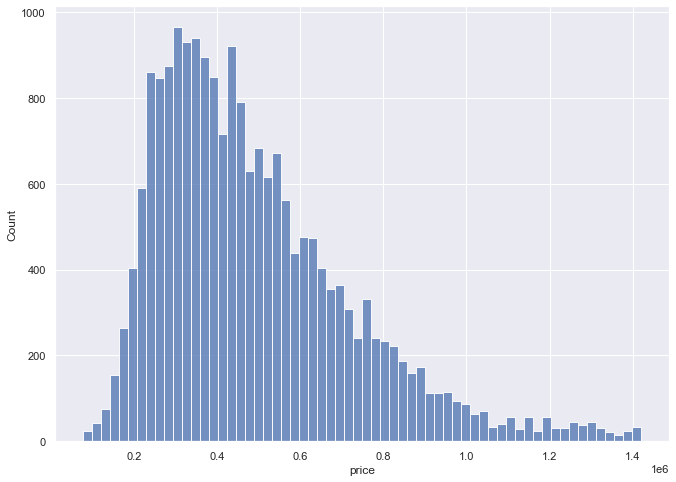

In [86]:
sns.histplot(df_new_1["price"])

Much tighter distribution compared to before removing outliers.

#### New Price and Location

Even though, this won't be our final plot for price and location distribution, let's see the difference with outliers removed.

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

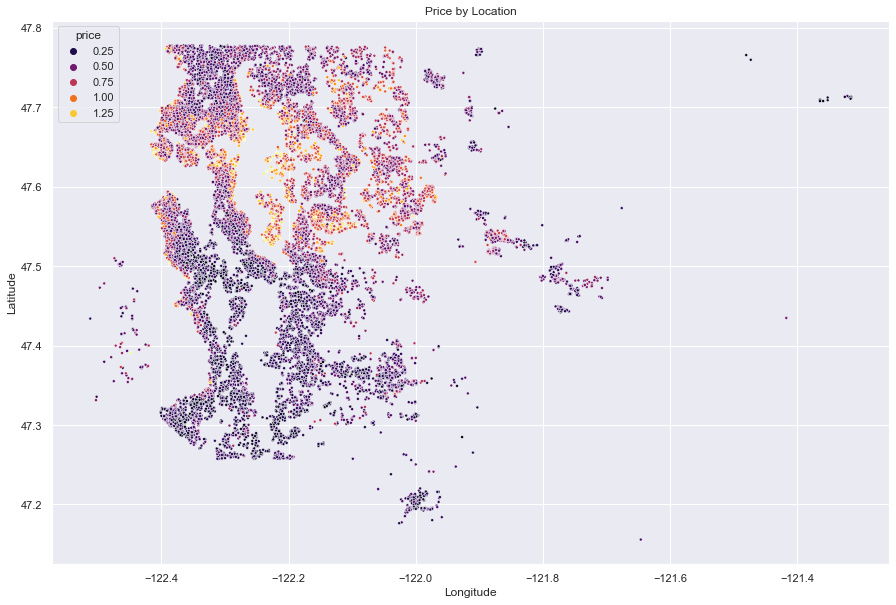

In [87]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_new_1["long"], y=df_new_1["lat"], hue=df_new_1["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

In [88]:
df_new_1["price"].describe()

count    2.016900e+04
mean     4.907284e+05
std      2.358591e+05
min      7.800000e+04
25%      3.150000e+05
50%      4.399950e+05
75%      6.142850e+05
max      1.420000e+06
Name: price, dtype: float64

Much better distribution of prices and the plot gives us a better perspective regarding location relation to home price.

Let's move on to the outliers of those other features we left out before.

#### Grade

In [89]:
df_new_1["grade"].describe()

count    20169.000000
mean         7.552184
std          1.052738
min          3.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         12.000000
Name: grade, dtype: float64

<AxesSubplot:xlabel='grade', ylabel='Count'>

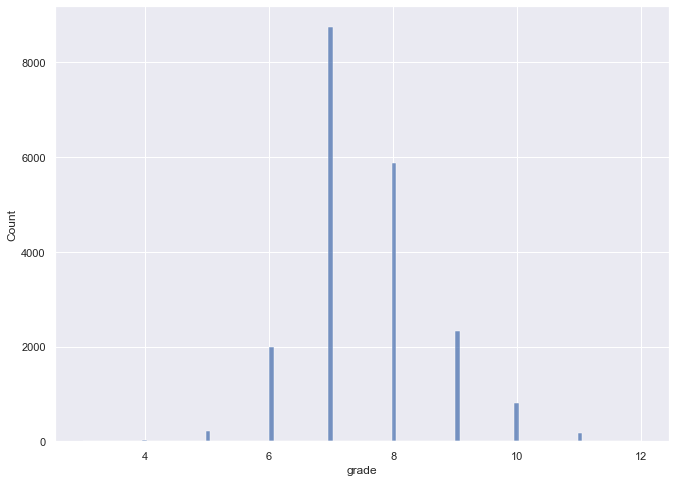

In [90]:
sns.histplot(df_new_1["grade"])

Let's set up the upper and lower limits.

In [91]:
upper_limit = df_new_1.grade.mean() + 3*df_new_1.grade.std()
upper_limit

10.710397559750565

In [92]:
lower_limit = df_new_1.grade.mean() - 3*df_new_1.grade.std()
lower_limit

4.393970529891955

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [93]:
df_new_1[(df_new_1.grade>upper_limit)|(df_new_1.grade<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
313,4139480200,6/18/2014,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,3,11,1997,0.0,98006,47.5503,-122.102,3860,11244
350,7325600160,6/4/2014,299000.0,1,0.75,560,12120,1.0,0.0,0.0,3,4,1967,0.0,98014,47.6750,-121.854,1300,19207
431,2944010240,9/8/2014,988000.0,4,3.00,4040,19700,2.0,0.0,0.0,3,11,1987,0.0,98052,47.7205,-122.127,3930,21887
465,8658300340,5/23/2014,80000.0,1,0.75,430,5050,1.0,0.0,0.0,2,4,1912,0.0,98014,47.6499,-121.909,1200,7500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20905,3864000120,4/8/2015,1180000.0,4,3.25,3780,10099,1.0,0.0,1.0,3,11,2006,0.0,98006,47.5508,-122.192,3120,10669
21018,8121100155,2/25/2015,810000.0,4,3.50,2700,2868,2.0,0.0,0.0,3,11,2006,0.0,98118,47.5685,-122.286,1430,3858
21134,1692900095,6/18/2014,1400000.0,4,2.75,3870,10046,2.0,0.0,0.0,3,11,2005,0.0,98033,47.6651,-122.191,3560,10046
21192,323059327,7/3/2014,1030000.0,4,3.50,4370,10860,2.0,0.0,0.0,3,11,2008,0.0,98059,47.5066,-122.148,3560,8070


Those entries below the "lower_limit" and above the "upper_limit".

In [94]:
df_new_2 = df_new_1[(df_new_1.grade<upper_limit) & (df_new_1.grade>lower_limit)]
df_new_2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='grade', ylabel='Count'>

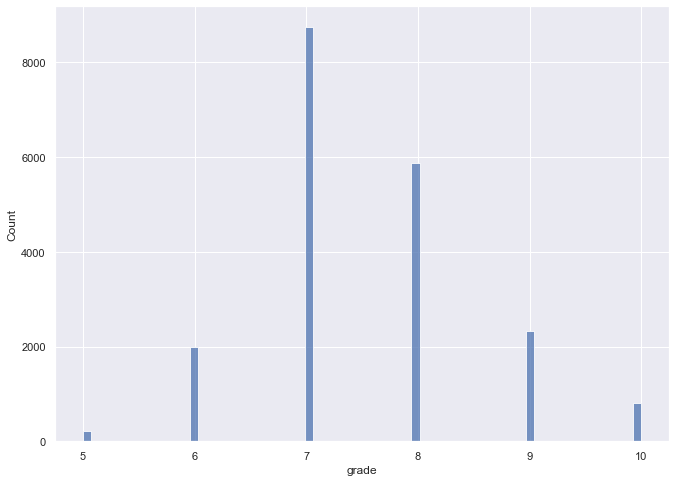

In [95]:
sns.histplot(df_new_2["grade"])

#### Condition

In [96]:
df_new_2["condition"].describe()

count    19964.000000
mean         3.414496
std          0.651027
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: condition, dtype: float64

<AxesSubplot:xlabel='condition', ylabel='Count'>

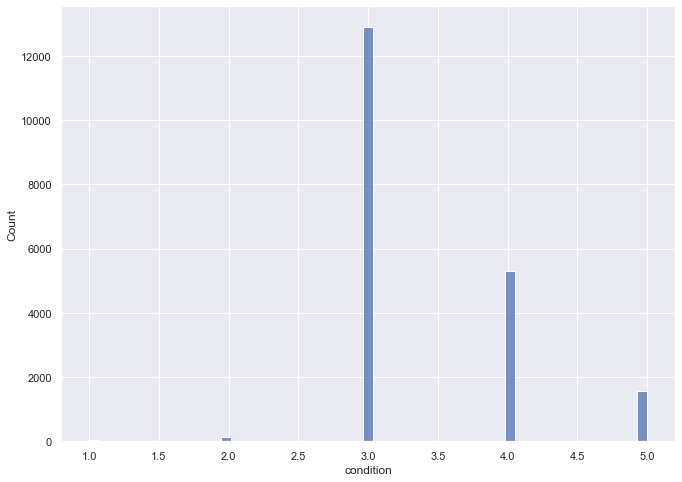

In [97]:
sns.histplot(df_new_2["condition"])

Let's set up the upper and lower limits.

In [98]:
upper_limit = df_new_2.condition.mean() + 3*df_new_2.condition.std()
upper_limit

5.367577516987661

In [99]:
lower_limit = df_new_2.condition.mean() - 3*df_new_2.condition.std()
lower_limit

1.4614146689470209

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [100]:
df_new_2[(df_new_2.condition>upper_limit)|(df_new_2.condition<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
36,9435300030,5/28/2014,550000.0,4,1.00,1660,34848,1.0,0.0,0.0,1,5,1933,0.0,98052,47.6621,-122.132,2160,11467
397,5175800060,6/23/2014,365000.0,4,2.00,1940,25600,1.0,0.0,0.0,1,8,1962,0.0,98006,47.5722,-122.129,2000,10071
1440,5694000710,11/7/2014,352950.0,3,1.00,1760,3000,1.5,0.0,0.0,1,6,1900,0.0,98103,47.6598,-122.348,1320,1266
1732,913000340,1/2/2015,252000.0,1,1.00,680,1638,1.0,0.0,4.0,1,6,1910,1992.0,98116,47.5832,-122.399,1010,3621
2221,3886902445,3/16/2015,535000.0,2,1.00,920,9000,1.0,0.0,0.0,1,6,1954,0.0,98033,47.6831,-122.189,1760,8400
3002,9187200245,12/31/2014,441000.0,4,1.50,1100,3300,1.0,0.0,0.0,1,7,1919,0.0,98122,47.6033,-122.295,2020,4000
3199,723049596,5/9/2014,255000.0,2,1.00,810,7980,1.0,0.0,0.0,1,6,1928,0.0,98146,47.4890,-122.337,1440,7980
3971,6324000090,5/11/2015,210000.0,2,1.00,990,8140,1.0,0.0,0.0,1,6,1910,0.0,98116,47.5828,-122.382,2150,5000
4647,859000110,10/2/2014,125000.0,1,1.00,500,7440,1.0,0.0,0.0,1,5,1928,0.0,98106,47.5252,-122.362,1350,7440
7369,9275200080,11/7/2014,295000.0,3,1.50,720,7450,1.0,0.0,1.0,1,5,1924,0.0,98126,47.5840,-122.375,2600,7360


Those entries below the "lower_limit" and above the "upper_limit".

In [101]:
df_new_3 = df_new_2[(df_new_2.condition<upper_limit) & (df_new_2.condition>lower_limit)]
df_new_3

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='condition', ylabel='Count'>

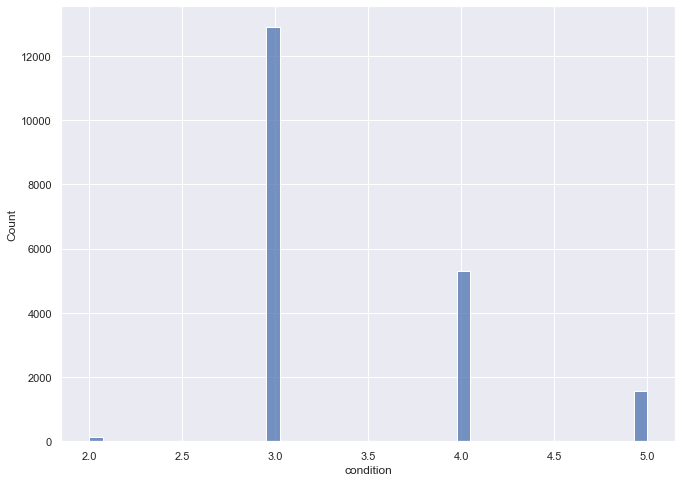

In [102]:
sns.histplot(df_new_3["condition"])

#### Yr_Built

In [103]:
df_new_3["yr_built"].describe()

count    19938.000000
mean      1970.347878
std         29.373279
min       1900.000000
25%       1951.000000
50%       1973.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

<AxesSubplot:xlabel='yr_built', ylabel='Count'>

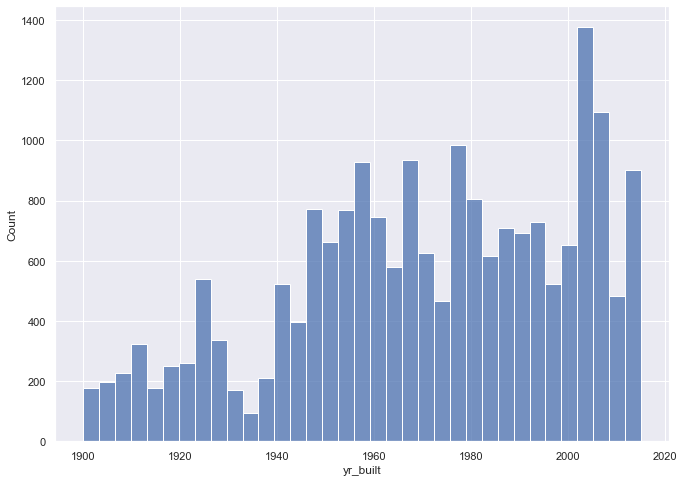

In [104]:
sns.histplot(df_new_3["yr_built"])

Let's set up the upper and lower limits.

In [105]:
upper_limit = df_new_3.yr_built.mean() + 3*df_new_3.yr_built.std()
upper_limit

2058.467716628846

In [106]:
lower_limit = df_new_3.yr_built.mean() - 3*df_new_3.yr_built.std()
lower_limit

1882.2280402173774

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [107]:
df_new_3[(df_new_3.yr_built>upper_limit)|(df_new_3.yr_built<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


No outliers to remove for yr_built.

#### Yr_renovated

In [108]:
df_new_3["yr_renovated"].describe()

count    19938.000000
mean        63.964590
std        351.546113
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2015.000000
Name: yr_renovated, dtype: float64

<AxesSubplot:xlabel='yr_renovated', ylabel='Count'>

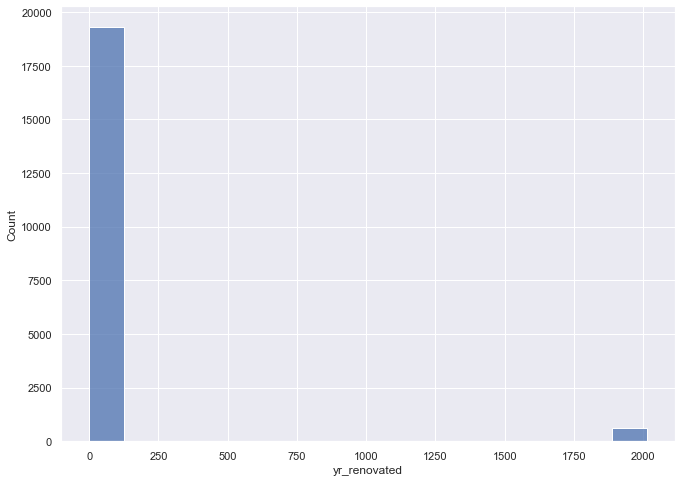

In [109]:
sns.histplot(df_new_3["yr_renovated"])

This feature "yr_renovated" doesn't seem to have much of a distribution. We will see if it has a correlation later on with price.

#### Floors

In [110]:
df_new_3["floors"].describe()

count    19938.000000
mean         1.476377
std          0.538849
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          3.500000
Name: floors, dtype: float64

<AxesSubplot:xlabel='floors', ylabel='Count'>

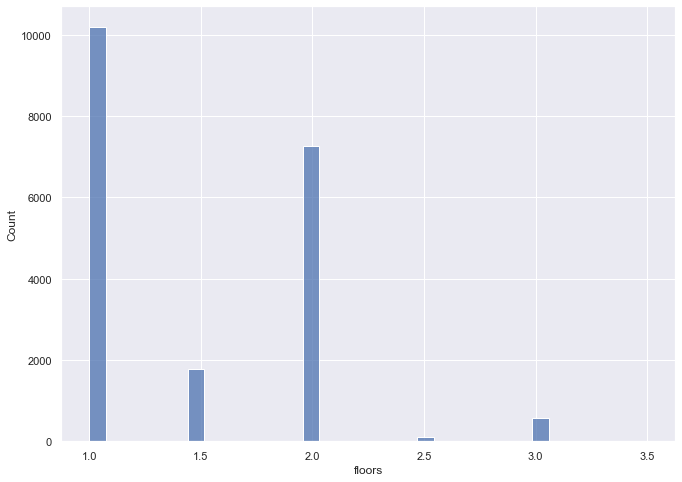

In [111]:
sns.histplot(df_new_3["floors"])

Let's set up the upper and lower limits.

In [112]:
upper_limit = df_new_3.floors.mean() + 3*df_new_3.floors.std()
upper_limit

3.092923925913987

In [113]:
lower_limit = df_new_3.floors.mean() - 3*df_new_3.floors.std()
lower_limit

-0.14017038995250664

So, these are the two boundaries that will help discern what is and what isn't an outlier.

In [114]:
df_new_3[(df_new_3.floors>upper_limit)|(df_new_3.floors<lower_limit)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
10066,1972202010,8/1/2014,435000.0,3,3.00,1440,1350,3.5,0.0,2.0,3,8,2005,0.0,98103,47.6525,-122.345,1440,1350
11582,3180100023,1/30/2015,544000.0,3,2.50,1760,1755,3.5,0.0,0.0,3,8,1998,0.0,98105,47.6688,-122.279,1700,1721
14871,8673400177,4/2/2015,525000.0,3,3.00,1730,1074,3.5,0.0,0.0,3,8,2006,0.0,98107,47.6692,-122.392,1370,1185
15410,1702900664,4/16/2015,479000.0,2,2.50,1730,1037,3.5,0.0,0.0,3,8,2008,0.0,98118,47.5594,-122.285,1280,1026
20292,1972200426,9/18/2014,525000.0,2,2.75,1310,1268,3.5,0.0,0.0,3,8,2007,0.0,98103,47.6534,-122.355,1350,1288
20756,1972200428,6/25/2014,563500.0,3,2.50,1400,1312,3.5,0.0,0.0,3,8,2007,0.0,98103,47.6534,-122.355,1350,1312


Those entries below the "lower_limit" and above the "upper_limit".

In [115]:
df_new_4 = df_new_3[(df_new_3.floors<upper_limit) & (df_new_3.floors>lower_limit)]
df_new_4

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8,2004,0.0,98027,47.5345,-122.069,1410,1287


<AxesSubplot:xlabel='floors', ylabel='Count'>

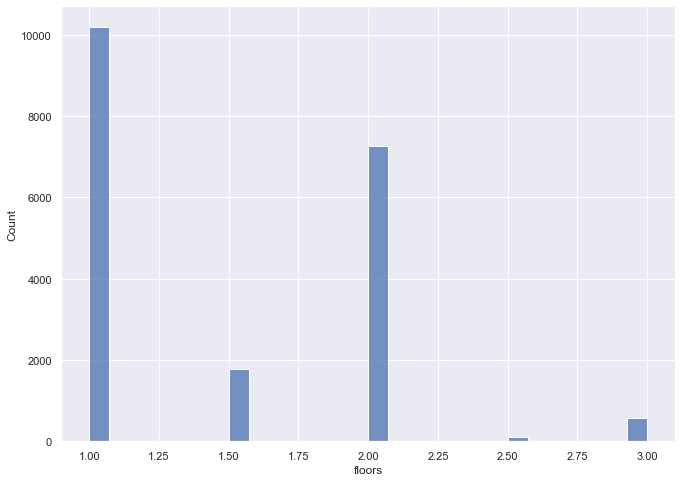

In [116]:
sns.histplot(df_new_4["floors"])

Doesn't help the distribution all that much but the real question is if there is a correlation between the number of floors and the resulting price of the home. 

Now outliers have been removed for all the features, we need need to test the features for their correlation to price.

## Exploratory Analysis - Feature selection

#### Correlation with Target Method

Simplifying the dataset means removing columns that might not be relevant for our current analysis.

If we are trying to investigate factors that affect the price and value of a home: 

1. So, "id" and "date" are irrelevant because they aren't really features pertaining to the house, not components of the house.
REMOVED "id" and "date"


So that leaves us with 18 other features (18 other columns excluding "price) to account for in our model.

To start, we can look at correlation between pairs of features to try to get an idea from there, what features may the most helpful in our model.

In [117]:
df_new_4.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.008546,0.007668,0.032771,0.022789,-0.108946,0.029209,0.025686,-0.028197,0.038874,0.036163,-0.011278,-0.009411,0.057251,0.024220,-0.097399
price,0.008546,1.000000,0.299355,0.442695,0.617115,0.092687,0.255178,0.294662,0.057837,0.622512,0.015045,0.107696,0.426256,0.018787,0.551444,0.091546
bedrooms,0.007668,0.299355,1.000000,0.493181,0.609691,0.113049,0.153688,0.045674,0.027243,0.334615,0.165173,0.002778,-0.036311,0.153553,0.398843,0.123828
bathrooms,0.032771,0.442695,0.493181,1.000000,0.708522,0.053853,0.505027,0.104555,-0.135713,0.614984,0.538506,0.030256,-0.002378,0.239947,0.527815,0.061024
sqft_living,0.022789,0.617115,0.609691,0.708522,1.000000,0.224953,0.334687,0.187479,-0.058389,0.698566,0.331293,0.034945,0.029485,0.256045,0.738169,0.240145
sqft_lot,-0.108946,0.092687,0.113049,0.053853,0.224953,1.000000,-0.115064,0.061530,0.048017,0.131796,0.022525,0.016371,-0.066650,0.258950,0.262659,0.809516
floors,0.029209,0.255178,0.153688,0.505027,0.334687,-0.115064,1.000000,-0.010215,-0.277547,0.456204,0.501542,-0.000482,0.035458,0.133510,0.258855,-0.124425
view,0.025686,0.294662,0.045674,0.104555,0.187479,0.061530,-0.010215,1.000000,0.041906,0.159609,-0.081364,0.080798,0.004233,-0.107983,0.210118,0.055403
condition,-0.028197,0.057837,0.027243,-0.135713,-0.058389,0.048017,-0.277547,0.041906,1.000000,-0.166376,-0.366383,-0.057734,-0.009502,-0.098410,-0.101670,0.061176
grade,0.038874,0.622512,0.334615,0.614984,0.698566,0.131796,0.456204,0.159609,-0.166376,1.000000,0.470043,0.002258,0.101315,0.206086,0.663991,0.161588


So even with correlation values with each pair of variables, it's still a lot of information to digest.
What are we looking for? : 
High absolute values in the "price" row/column

To make it easier for us to discern, let's use a heatmap.

<AxesSubplot:>

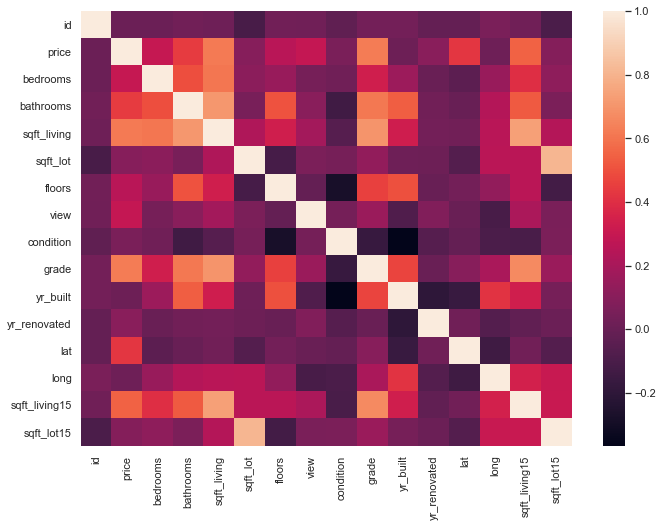

In [118]:
sns.heatmap(df_new_4.corr())

Still a bit cluttered. (The lighter colors along the "price" row/column, represent the positive correlations between price and another variable).

Isolating the "price" column can give us a better visual to draw conclusions from.

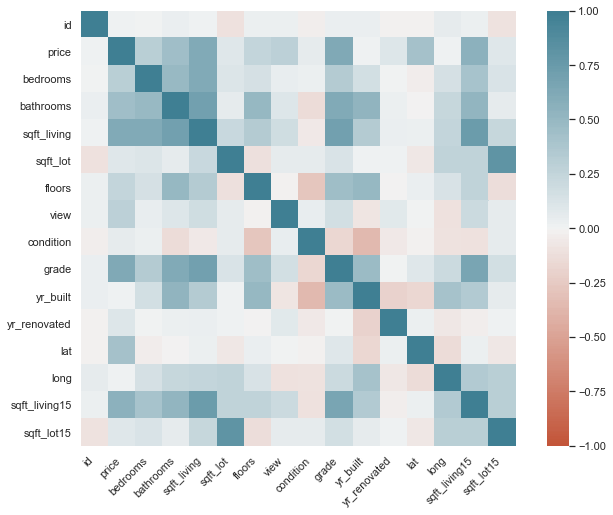

In [119]:
corr = df_new_4.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [120]:
price_corrs = df_new_4.corr()["price"].map(abs).sort_values(ascending=False)
price_corrs

price            1.000000
grade            0.622512
sqft_living      0.617115
sqft_living15    0.551444
bathrooms        0.442695
lat              0.426256
bedrooms         0.299355
view             0.294662
floors           0.255178
yr_renovated     0.107696
sqft_lot         0.092687
sqft_lot15       0.091546
condition        0.057837
long             0.018787
yr_built         0.015045
id               0.008546
Name: price, dtype: float64

###### The highest correlation was "sqft_living" (sqft footage of living space of home) to "price"; and "grade" (quality of the house) to "price". 

#### Final_Location__price_map

Also, let's look at the distribution of prices based on location, now that we've cleaned all our features.

[Text(0.5, 0, 'Longitude'),
 Text(0, 0.5, 'Latitude'),
 Text(0.5, 1.0, 'Price by Location')]

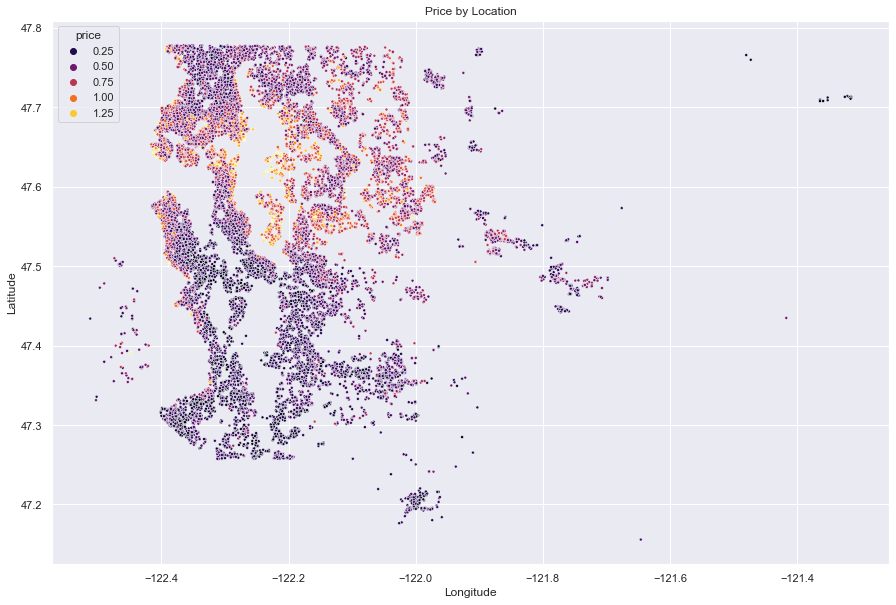

In [121]:
fig = plt.figure(figsize=(15,10))
ax = sns.scatterplot(x=df_new_4["long"], y=df_new_4["lat"], hue=df_new_4["price"], palette="inferno",
                     marker=".")
ax.set( xlabel="Longitude",
        ylabel="Latitude", 
        title="Price by Location")

So this scatter plot reflects the results of our heatmap for correlation to "price". Latitude is more relevant to price as higher priced homes are above 47.5° N. There is strict contrast of home prices above and below 47.5° N. Though as shown in the heatmap for correlation, there is a very weak correlation between longitude and price.

## Preprocessing

In [122]:
df_clean = df_new_4.copy()
df_clean.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503


#### Encoding the categorical data

This includes "zipcode" and "waterfront".

In [123]:
df_clean["waterfront"] = df_clean["waterfront"].str.replace("0.0", "Absent").str.replace("1.0", "Present")
df_clean.head()

<ipython-input-123-229aa746fac1>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df_clean["waterfront"] = df_clean["waterfront"].str.replace("0.0", "Absent").str.replace("1.0", "Present")


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,Absent,0.0,3,7,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,Absent,0.0,3,7,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,Absent,0.0,3,6,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,Absent,0.0,5,7,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,Absent,0.0,3,8,1987,0.0,98074,47.6168,-122.045,1800,7503


Get dummies should be able to extend out every feature out into it's values for different columns.

In [124]:
df_prep = pd.get_dummies(df_clean, columns=["zipcode", "waterfront"])
df_prep.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_Absent,waterfront_Present
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,3,...,0,0,0,0,1,0,0,0,1,0
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,3,...,0,0,0,0,0,0,0,0,1,0
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,3,...,0,0,0,0,0,0,0,0,1,0
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,5,...,0,0,0,0,0,0,0,0,1,0
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,3,...,0,0,0,0,0,0,0,0,1,0


So now, that has extended the "zipcode" and "waterfront" values to become their own features so to speak.

In [125]:
df_prep.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19932 entries, 0 to 21596
Data columns (total 89 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  19932 non-null  int64  
 1   date                19932 non-null  object 
 2   price               19932 non-null  float64
 3   bedrooms            19932 non-null  int64  
 4   bathrooms           19932 non-null  float64
 5   sqft_living         19932 non-null  int64  
 6   sqft_lot            19932 non-null  int64  
 7   floors              19932 non-null  float64
 8   view                19932 non-null  float64
 9   condition           19932 non-null  int64  
 10  grade               19932 non-null  int64  
 11  yr_built            19932 non-null  int64  
 12  yr_renovated        19932 non-null  float64
 13  lat                 19932 non-null  float64
 14  long                19932 non-null  float64
 15  sqft_living15       19932 non-null  int64  
 16  sqft

Now to drop "id" and "date" so, we may use this data in our model. 

Data used by the models must be numerical in nature, floats or integers. 
However, "date" values are objects and since we "date" and "id" features don't correlate to "price", we can definitely drop them.

In [126]:
df_prep = df_prep.drop(columns=["id", "date"])
df_prep.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_Absent,waterfront_Present
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,...,0,0,0,0,1,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,...,0,0,0,0,0,0,0,0,1,0


## Model Building

#### Model_1

This model will borrow the dataset from model_3 and will drop "sqft_above" and "sqft_basement"

In [127]:
df_model_1 = df_prep.copy()
df_model_1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,yr_built,...,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199,waterfront_Absent,waterfront_Present
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1955,...,0,0,0,0,1,0,0,0,1,0
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,...,0,0,0,0,0,0,0,0,1,0
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,...,0,0,0,0,0,0,0,0,1,0
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,...,0,0,0,0,0,0,0,0,1,0
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,...,0,0,0,0,0,0,0,0,1,0


In [128]:
X1 = df_model_1.drop("price", axis=1)
Y1 = df_model_1["price"]

X1_scaled = (X1 - np.mean(X1))/ np.std(X1)
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.2, random_state=11)

In [129]:
preds_1 = sm.add_constant(X1_scaled)
model_1 = sm.OLS(Y1, preds_1).fit()
display(model_1.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     1153.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        17:24:19   Log-Likelihood:            -2.5671e+05
No. Observations:               19932   AIC:                         5.136e+05
Df Residuals:                   19847   BIC:                         5.143e+05
Df Model:                          84                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4.864e+05    673.501    722.188      0.000    4.85e+05    4.88e+05
bedrooms           -3804.1149    897.554     -4.238      0.000   -5563.395   -2044.835
bathrooms           7725.6972   1162.739      6.644      0.000    5446.632       1e+04
sqft_living         7.837e+04   1425.698     54.969      0.000    7.56e+04    8.12e+04
sqft_lot            1.121e+04   1159.443      9.666      0.000    8934.388    1.35e+04
floors              1278.7071    931.065      1.373      0.170    -546.259    3103.673
view                2.559e+04    769.895     33.233      0.000    2.41e+04    2.71e+04
condition           1.481e+04    773.077     19.160      0.000    1.33e+04    1.63e+04
grade               5.143e+04   1178.121     43.653      0.000    4.91e+04    5.37e+04
yr_built           -1.827e+04   1179.291    -15.495      0.000   -2.06e+04    -1.6e+04
yr_renovated        6975.3677    715.175      9.753      0.000    5573.565    8377.171
lat                 8990.9580   5697.745      1.578      0.115   -2177.098    2.02e+04
long               -6495.5171   4153.814     -1.564      0.118   -1.46e+04    1646.305
sqft_living15       2.223e+04   1179.209     18.848      0.000    1.99e+04    2.45e+04
sqft_lot15         -4727.5577   1244.262     -3.799      0.000   -7166.414   -2288.701
zipcode_98001      -2.121e+04   1541.193    -13.764      0.000   -2.42e+04   -1.82e+04
zipcode_98002      -1.359e+04   1214.714    -11.188      0.000    -1.6e+04   -1.12e+04
zipcode_98003      -1.962e+04   1399.406    -14.023      0.000   -2.24e+04   -1.69e+04
zipcode_98004       3.752e+04    709.568     52.872      0.000    3.61e+04    3.89e+04
zipcode_98005         1.3e+04    713.784     18.218      0.000    1.16e+04    1.44e+04
zipcode_98006       1.315e+04    740.671     17.757      0.000    1.17e+04    1.46e+04
zipcode_98007       6412.3499    722.447      8.876      0.000    4996.293    7828.406
zipcode_98008       7678.2840    811.527      9.462      0.000    6087.623    9268.944
zipcode_98010      -3703.8774    950.263     -3.898      0.000   -5566.473   -1841.282
zipcode_98011      -4814.6893   1032.418     -4.664      0.000   -6838.315   -2791.064
zipcode_98014      -2365.0360   1042.590     -2.268      0.023   -4408.599    -321.473
zipcode_98019      -6933.8509   1200.257     -5.777      0.000   -9286.455   -4581.247
zipcode_98022      -1.335e+04   1617.136     -8.253      0.000   -1.65e+04   -1.02e+04
zipcode_98023      -2.909e+04   1890.729    -15.387      0.000   -3.28e+04   -2.54e+04
zipcode_98024       -506.3409    801.423     -0.632      0.528   -2077.197    1064.515
zipcode_98027       3427.6615    941.012      3.643      0.000    1583.199    5272.124
zipcode_98028      -7059.2525   1150.211     -6.137      0.000   -9313.762   -4804.743
zipcode_98029       7691.3027   1050.0

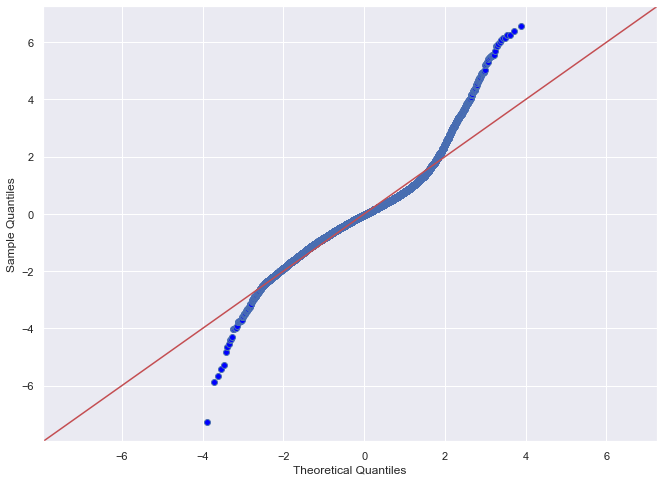

In [130]:
fig = sm.graphics.qqplot(model_1.resid, dist=stats.norm, line="45", fit=True)

We see very abnormal residues as especially towards the end, the points are far away from the red line.


* High R-squared 0.83: meaning we can explain about 83% of the variance pertaining to "price"
  That's really good.


However:

* Extremely high condition number, meaning this model is ill-conditioned.

* We also have several features "floors", "lat", "long", and quite a few zipcodes where 
  the p-value > than 0.05 
  Meaning not statistically significant and indicates strong evidence for the null hypothesis.

<b>Metrics for Model_1</b>

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_1 = mean_absolute_error(Y1, model_1.predict(preds_1))
mae_1

67616.70589827692

Accuracy of model, prediction off the mean by +/- 67617 USD

In [132]:
mae_1/df_clean.price.mean()

0.13901629954261674

Margin of Error: 13.9%

In [133]:
msqu_1 = mean_squared_error(Y1, model_1.predict(preds_1))
msqu_1

9002671426.651663

That's the mean squared error for model 1.
We square root that to get the root mean squared error (RMSE).

In [134]:
rmse_1 = np.sqrt(msqu_1)
rmse_1

94882.4084151096

In [135]:
print("Root Mean Square Error:", rmse_1)
print("Mean Absolute Error:", mae_1)

Root Mean Square Error: 94882.4084151096
Mean Absolute Error: 67616.70589827692


<AxesSubplot:ylabel='Count'>

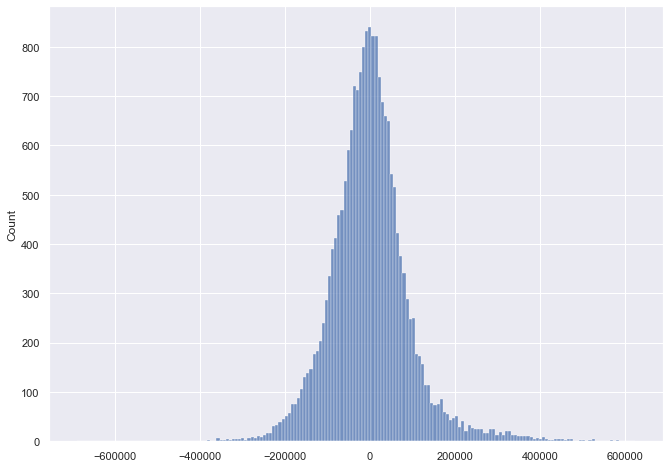

In [136]:
sns.histplot(model_1.resid)

Histogram depicting model_1 distribution.

So, we've seen the p-values of model_1. There were quite a few that were over 0.05, not statistically significant.

Namely:
* floors       : 0.170

* lat          : 0.115

* long         : 0.118

* zipcode_98024: 0.528

* zipcode_98034: 0.832

* zipcode_98072: 0.089

* zipcode_98077: 0.134

* zipcode_98125: 0.430

* zipcode_98126: 0.458

* zipcode_98177: 0.084


Since the model_1 displayed strong multicollinearity, we will try looking at VIF values to improve upon model_1 in model_2.

#### VIF

Let's try using vif (variance inflation factor) values of the features to help reduce multicollinearity in  model_2.

In [137]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [138]:
vif = [variance_inflation_factor(df_model_1.values, i) for i in range(df_model_1.shape[1])]
X1_cols = list(df_model_1.columns)

list(zip(X1_cols, vif))

C:\Users\bigbenx3\anaconda3\envs\learn-env\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


[('price', 5.880314181988105),
 ('bedrooms', 1.7776134281400284),
 ('bathrooms', 2.987121240098808),
 ('sqft_living', 5.163253530126195),
 ('sqft_lot', 2.977570461576909),
 ('floors', 1.9112827777776715),
 ('view', 1.379448423572563),
 ('condition', 1.3419280431843004),
 ('grade', 3.3536649601247177),
 ('yr_built', 3.1030426004721443),
 ('yr_renovated', 1.1329869856353352),
 ('lat', 71.57872132182938),
 ('long', 38.042674741423504),
 ('sqft_living15', 3.1203970970685897),
 ('sqft_lot15', 3.4155660239880623),
 ('zipcode_98001', inf),
 ('zipcode_98002', inf),
 ('zipcode_98003', inf),
 ('zipcode_98004', inf),
 ('zipcode_98005', inf),
 ('zipcode_98006', inf),
 ('zipcode_98007', inf),
 ('zipcode_98008', inf),
 ('zipcode_98010', inf),
 ('zipcode_98011', inf),
 ('zipcode_98014', inf),
 ('zipcode_98019', inf),
 ('zipcode_98022', inf),
 ('zipcode_98023', inf),
 ('zipcode_98024', inf),
 ('zipcode_98027', inf),
 ('zipcode_98028', inf),
 ('zipcode_98029', inf),
 ('zipcode_98030', inf),
 ('zipcode_

After looking at the VIF values, removing "lat": 71.58 and "long": 38.04, as well as the waterfront and zipcode features from the dataframe used for model_2 might help reduce multicollinearity. Other than the zipcode features and the waterfront features (inf), these two features have the largest VIF above 5.

#### Model_2

This model will borrow the dataset from model_1 and will drop those features with VIF values above 5.

In [139]:
df_model_2 = df_model_1[["sqft_lot", "sqft_living",
                    "grade", "condition", "bathrooms", "bedrooms",
                    "price", "floors", "view", "yr_built", 
                         "yr_renovated", "sqft_living15", "sqft_lot15"]]
df_model_2.head()

,sqft_lot,sqft_living,grade,condition,bathrooms,bedrooms,price,floors,view,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,5650,1180,7,3,1.00,3,221900.0,1.0,0.0,1955,0.0,1340,5650
1,7242,2570,7,3,2.25,3,538000.0,2.0,0.0,1951,1991.0,1690,7639
2,10000,770,6,3,1.00,2,180000.0,1.0,0.0,1933,0.0,2720,8062
3,5000,1960,7,5,3.00,4,604000.0,1.0,0.0,1965,0.0,1360,5000
4,8080,1680,8,3,2.00,3,510000.0,1.0,0.0,1987,0.0,1800,7503


In [140]:
X2 = df_model_2.drop("price", axis=1)
Y2 = df_model_2["price"]

X2_scaled = (X2 - np.mean(X2))/ np.std(X2)
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, test_size=0.2, random_state=11)

In [141]:
preds_2 = sm.add_constant(X2_scaled)
model_2 = sm.OLS(Y2, preds_2).fit()
display(model_2.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     2404.
Date:                Wed, 12 May 2021   Prob (F-statistic):               0.00
Time:                        17:24:35   Log-Likelihood:            -2.6544e+05
No. Observations:               19932   AIC:                         5.309e+05
Df Residuals:                   19919   BIC:                         5.310e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.864e+05   1041.928    466.821      0.000    4.84e+05    4.88e+05
sqft_lot       1285.5573   1782.028      0.721      0.471   -2207.366    4778.481
sqft_living     6.15e+04   2170.382     28.334      0.000    5.72e+04    6.58e+04
grade          1.025e+05   1688.177     60.728      0.000    9.92e+04    1.06e+05
condition      1.476e+04   1154.145     12.789      0.000    1.25e+04     1.7e+04
bathrooms      2.228e+04   1775.205     12.549      0.000    1.88e+04    2.58e+04
bedrooms      -1.545e+04   1361.831    -11.347      0.000   -1.81e+04   -1.28e+04
floors         1.971e+04   1343.962     14.667      0.000    1.71e+04    2.23e+04
view           2.434e+04   1092.634     22.281      0.000    2.22e+04    2.65e+04
yr_built      -8.647e+04   1486.295    -58.181      0.000   -8.94e+04   -8.36e+04
yr_renovated   4690.7224   1096.502      4.278      0.000    2541.488    6839.957
sqft_living15  3.308e+04   1684.558     19.637      0.000    2.98e+04    3.64e+04
sqft_lot15    -1.669e+04   1820.107     -9.172      0.000   -2.03e+04   -1.31e+04
==============================================================================
Omnibus:                     2037.259   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4320.966
Skew:                           0.649   Prob(JB):                         0.00
Kurtosis:                       4.875   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

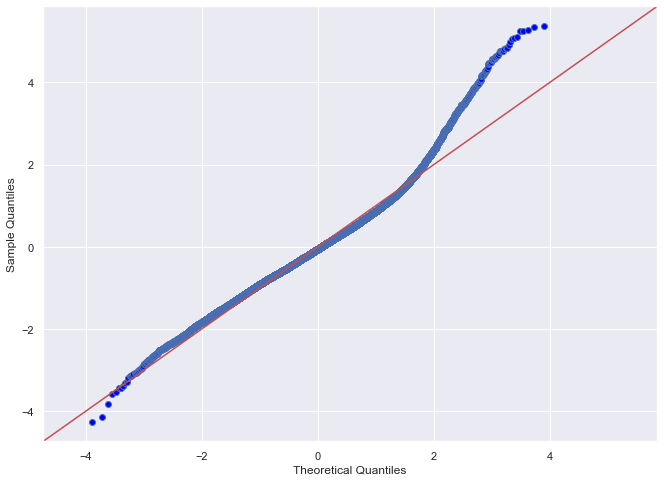

In [142]:
fig = sm.graphics.qqplot(model_2.resid, dist=stats.norm, line="45", fit=True)

We see very abnormal residues as especially towards the end, the points are far away from the red line.


* Low R-squared 0.59: meaning we can explain about 59% of the variance pertaining to "price"
  Very poor

* Very low condition number, meaning this model is well-conditioned. It shows on the visual. Other than the 
  front end, the plotted data points are close to the red line, indicating the overall normal residues.

<b>Metrics for Model_2</b>

In [143]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae_2 = mean_absolute_error(Y2, model_2.predict(preds_2))
mae_2

111017.76682258763

Accuracy of model, prediction off the mean by +/- 111018 USD

In [144]:
mae_2/df_clean.price.mean()

0.22824653940372605

Margin of Error: 22.8% Accuracy has suffered greatly.

In [145]:
msqu_2 = mean_squared_error(Y2, model_2.predict(preds_2))
msqu_2

21624344003.605213

That's the mean squared error for model 1.
We square root that to get the root mean squared error (RMSE).

In [146]:
rmse_2 = np.sqrt(msqu_2)
rmse_2

147052.181226955

In [147]:
print("Root Mean Square Error:", rmse_2)
print("Mean Absolute Error:", mae_2)

Root Mean Square Error: 147052.181226955
Mean Absolute Error: 111017.76682258763


<AxesSubplot:ylabel='Count'>

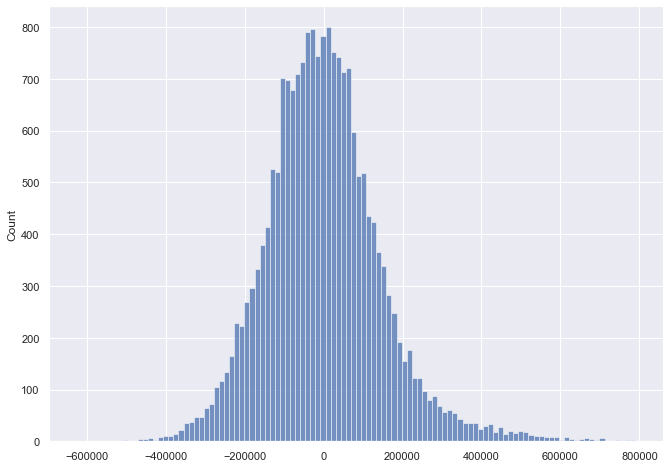

In [148]:
sns.histplot(model_2.resid)

Histogram depicting model_2 distribution.

So, even though the qqplot depicts greater normal residues plotted, the accuracy of the model has suffered and this current model can only explain 59.2% of the variance surrounding price.

## Which Model?

I think I'll go with model_1 because of the greater accuracy model_1 shows over model_2. Although, it's like picking the lesser of two evils since, the model's accuracy may or may not reflect predictability of future data.

## Data Question - Answers

1. The factors most affecting the price of a house are:

* Location(lat)

* Quality of the house(grade)

* Living area(sqft_living)


## Results

* We have a model that has an Coefficient of Determination(R-squared) value of 0.83 which indicates that our model can explain about 83% of all variation in the data around the mean.


* With a Mean Absolute Error of around 67616 USD, that means our predicted price is, on average, 67616 USD off from our mean. While that number doesn't look too bad our Root Mean Squared Error is around 94882 USD which means that our model is being heavily penalized for predictions that are very far off the actual price.


* Average home price: 486,394 USD. The price prediction was +/- 67616 off the real price (13.9% margin of error)


In [149]:
df_clean.price.mean()

486394.0855910094

## Conclusions

Descriptive analysis and modeling reveal which factors contribute most to housing prices: 

● Increase Living Area(in square feet) 

● Buy homes in regions specified (North of 47.55°N latitude are the more expensive homes) 
    maybe homes outside of this region will likely be more affordable) 
    
● Upgrade the quality of your home:
  This includes a large part curb appeal, fixing up the walkway, shrubbery surrounding the house, outdoor patio - 
  making the house more aesthetic from the outside. Making your house more energy efficient. Fresh coats of paint 
  could do a great deal like in the kitchen can alter the overall feel. (link below)

https://www.bankrate.com/loans/home-improvement/cheap-fixes-to-boost-the-value-of-your-home/

## Future Research

* The data we were provided was from 2014 to 2015. And such outdated data may not give us the optimal insights relevant to 
  today's housing situation

* We should be able to get a lot more out of the location data, with further analysis, incorporating data relevant to the 
  zipcode so there is a better determination for prices that can be expected in a more defined area.

* Also, streamlining the methods of getting a more fitted model without going too far into "overfitted" territory. 
  Like I've mentioned before, there is a happy medium in there.

* The most obvious next step is to try out new modeling techniques.  While linear regression is a good start, there are many 
  other techniques that I believe could help make better predictions.  Of particular interest to me in this context are 
  Polynomial Regression and Weighted Least Squares, that might be promising.

## Presentation Prep

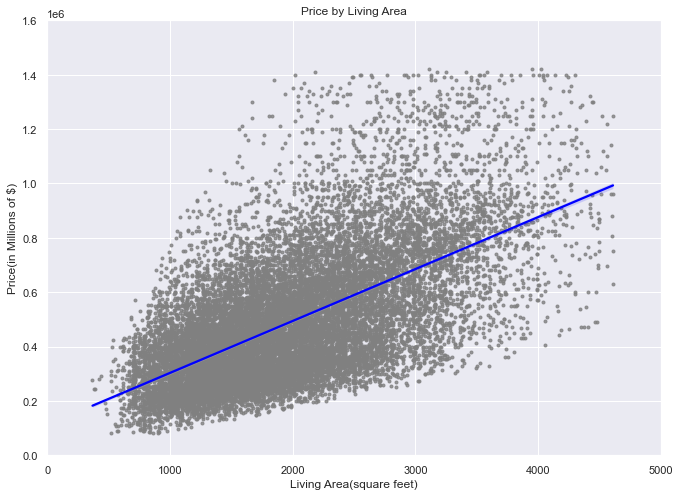

In [150]:
fig = plt.figure(figsize=(11,8))
ax = sns.regplot(data=df_clean, x="sqft_living", y="price", marker=".",
     scatter_kws={"color": "grey"}, line_kws={"color": "blue"})

ax.set(  xlabel="Living Area(square feet)",
         ylabel="Price(in Millions of $)", 
         title="Price by Living Area",
 )


plt.xlim([0,5000])
plt.ylim([0, 1600000])
plt.show()

In [151]:
df_clean.grade.describe()

count    19932.000000
mean         7.528096
std          0.994624
min          5.000000
25%          7.000000
50%          7.000000
75%          8.000000
max         10.000000
Name: grade, dtype: float64

[[Text(0, 0, '5'),
  Text(1, 0, '6'),
  Text(2, 0, '7'),
  Text(3, 0, '8'),
  Text(4, 0, '9'),
  Text(5, 0, '10')],
 Text(0.5, 0, 'Grade'),
 Text(0, 0.5, 'Price (in Thousands of $)'),
 Text(0.5, 1.0, 'Price by Grade')]

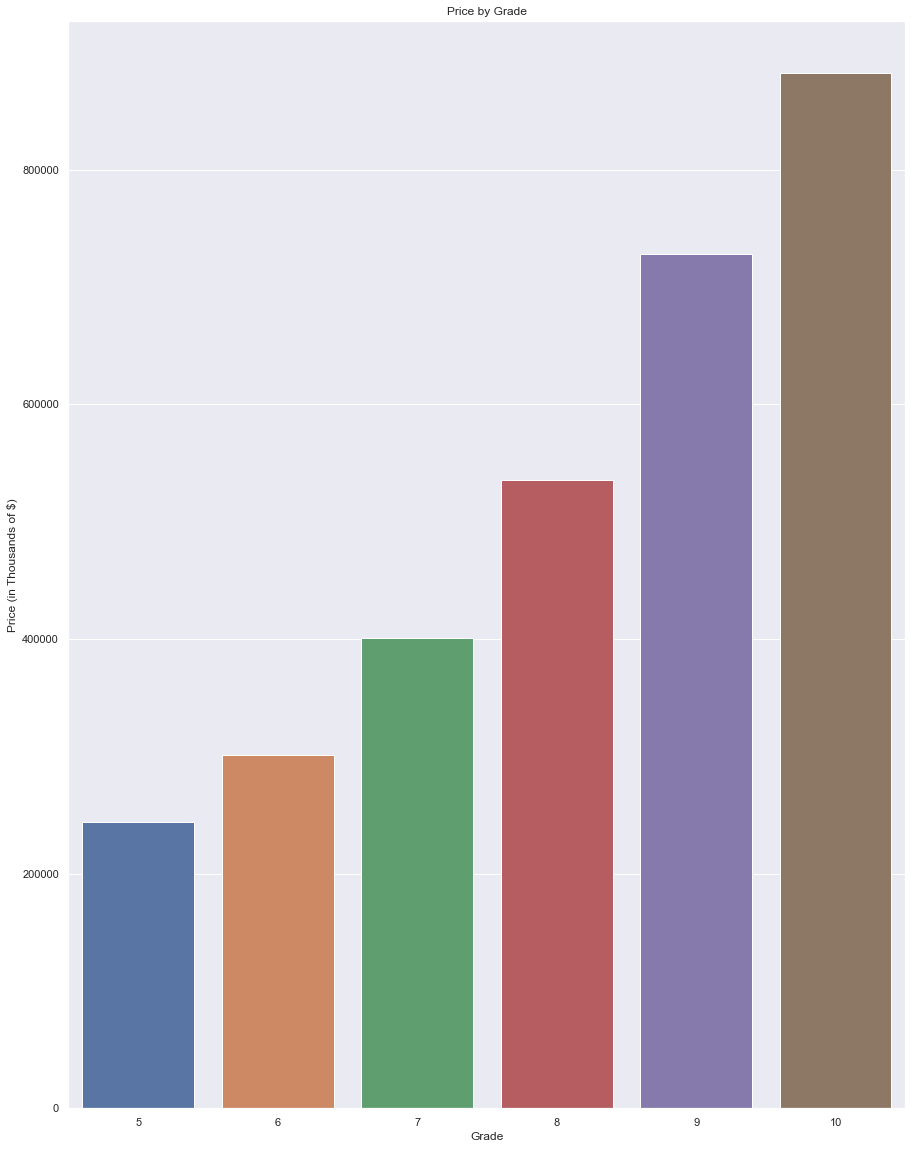

In [152]:
fig = plt.figure(figsize=(15,20))
ax = sns.barplot(data=df_clean, x="grade", y="price", ci=None)
ax.set( xticklabels=(["5", "6", "7", "8", "9", "10"]),
        xlabel="Grade",
        ylabel="Price (in Thousands of $)", 
        title="Price by Grade"  )